In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

In [3]:
from utils.evolution_functions import generate_random_samples
from utils.statistic_utils import run_chi_squared_test

# Implementação 4

Dados de entrada:
- Valores adaptativos / coeficientes de seleção
- Frequências alélicas iniciais
- Número de gerações (iterar até o ponto de equilíbrio)
### Gráficos com diferentes p iniciais, pelo menos p0 = 0.5
- p x T e p x AA, Aa, aa
- Δp x p
- Paisagem adaptativa: wmed x p

In [4]:
def next_gen(p2, pq, q2, wAA, wAa, waa):
    # Calcular frequência ajustada
    wAA_adj = wAA * p2
    wAa_adj = wAa * pq
    waa_adj = waa * q2

    # Calcular aptidão média
    w_med = wAA_adj + wAa_adj + waa_adj

    wAA_apos = wAA_adj / w_med
    wAa_apos = wAa_adj / w_med
    waa_apos = waa_adj / w_med

    # Calcular frequência após
    p1 = wAA_apos + 0.5 * wAa_apos
    q1 = 1 - p1

    return p1, q1, w_med

def calc_freq(p0, q0):
    p2 = p0**2
    pq = 2*p0*q0
    q2 = q0**2
    return p2, pq, q2

def run(p0, q0, wAA, wAa, waa, n_gen):
    decimals = 10
    N = 1e9
    n = 1
    p2, pq, q2 = calc_freq(p0, q0)

    p_list = []
    q_list = []
    p2_list = []
    pq_list = []
    q2_list = []
    delta_p = []
    w_med_list = []

    p_list.append(p0)
    q_list.append(q0)
    p2_list.append(p2)
    pq_list.append(pq)
    q2_list.append(q2)

    expected = generate_random_samples(p0, q0, N)

    ehw_gens = {}
    dict_key = f'{wAA}_{wAa}_{waa}'
    for i in range(n_gen):
        p, q, w_med = next_gen(p2_list[i], pq_list[i], q2_list[i], wAA, wAa, waa)
        p2, pq, q2 = calc_freq(p, q)

        # print(w_med)
        # print(p, q)
        # print(p2, pq, q2)

        # if round(p, decimals) == round(p_list[i], decimals):
        #     print(f'Equilíbrio atingido em {i}?')
        #     break
        observed = generate_random_samples(p, q, N)
        chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
        if not is_correlated and not ehw_gens.get(dict_key, None):
            ehw_gens[dict_key] = i

        delta_p.append(abs(p - p_list[i]))
        p_list.append(p)
        q_list.append(q)
        p2_list.append(p2)
        pq_list.append(pq)
        q2_list.append(q2)
        w_med_list.append(w_med)

    print(delta_p)
    # No plot, marcar quando sai do EHW...

    # Plot da paisagem adaptativa
    plt.figure(figsize=(16, 9))

    plt.subplot(2, 3, 1)
    plt.plot(p_list, label='p')
    plt.plot(q_list, label='q')
    if ehw_gens.get(dict_key, None): plt.axvline(x=ehw_gens.get(dict_key, None), color='r', linestyle='--', label='EHW')
    plt.title("P e Q por T")
    plt.legend()


    plt.subplot(2, 3, 2)
    plt.plot(p2_list, label='p2')
    plt.plot(pq_list, label='pq')
    plt.plot(q2_list, label='q2')
    plt.title("P², PQ e Q² por T")
    if ehw_gens.get(dict_key, None): plt.axvline(x=ehw_gens.get(dict_key, None), color='r', linestyle='--', label='EHW')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.plot(w_med_list, label='w_med')
    plt.title("w médio por T")
    if ehw_gens.get(dict_key, None): plt.axvline(x=ehw_gens.get(dict_key, None), color='r', linestyle='--', label='EHW')
    plt.legend()
    plt.show()

    plt.figure(figsize=(16, 9))

    plt.subplot(2, 3, 1)
    plt.plot(p_list, p2_list, label='p x AA')
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.plot(p_list, pq_list, label='p x Aa')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.plot(p_list, q2_list, label='p x aa')
    plt.legend()
    plt.show()

    # plt.figure(figsize=(10, 10))
    plt.plot(w_med_list, p_list[1:], label='w_med x p')
    plt.legend()
    plt.show()

    # plt.figure(figsize=(10, 10))
    plt.plot(delta_p, label='delta_p x T')
    plt.legend()
    plt.show()


# Caso 1:
- Dominância: wAA = 1; wAa = 1; waa = 0,9

[0.012820512820512886, 0.012467385354448468, 0.012110354512774979, 0.011751832505015436, 0.01139393420356083, 0.011038490535127399, 0.010687065800010775, 0.010340977551553165, 0.010001317901207174, 0.009668975338489205, 0.009344656360048553, 0.009028906382476665, 0.008722129567117598, 0.008424607312158106, 0.00813651526934589, 0.007857938822362631, 0.007588887024186919, 0.007329305034765032, 0.007079085130937801, 0.006838076380493163, 0.006606093083808107, 0.006382922091769605, 0.006168329109210169, 0.005962064090274777, 0.005763865827044579, 0.005573465826185564, 0.005390591561017399, 0.0052149691786677055, 0.0050463257342361345, 0.00488439101637228, 0.0047288990215420545, 0.004579589127593042, 0.004436207011115023, 0.004298505347515524, 0.0041662443277104, 0.004039192020839577, 0.003917124608420752, 0.0037998265118314167, 0.0036870904319055153, 0.003578717316712776, 0.003474516271224637, 0.0033743044205066797, 0.003277906736299907, 0.003185155835305764, 0.0030958917561669796, 0.00300

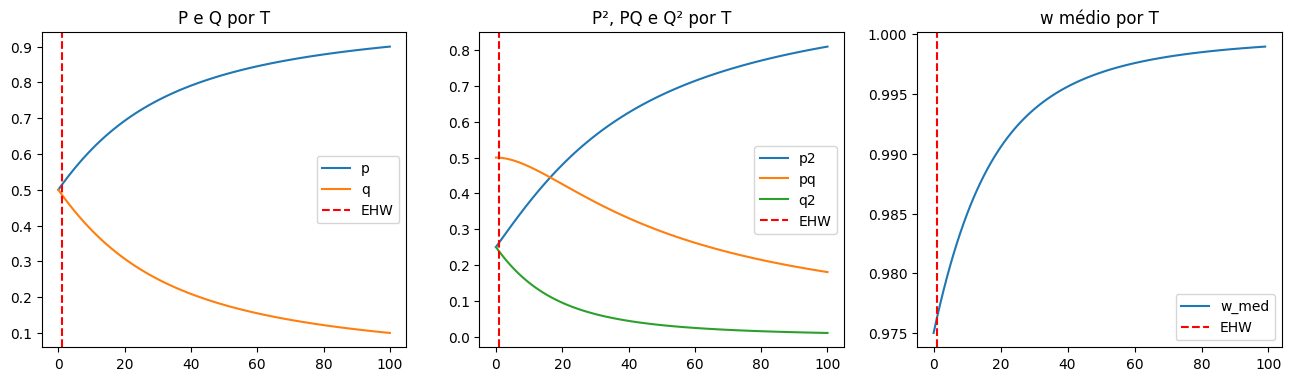

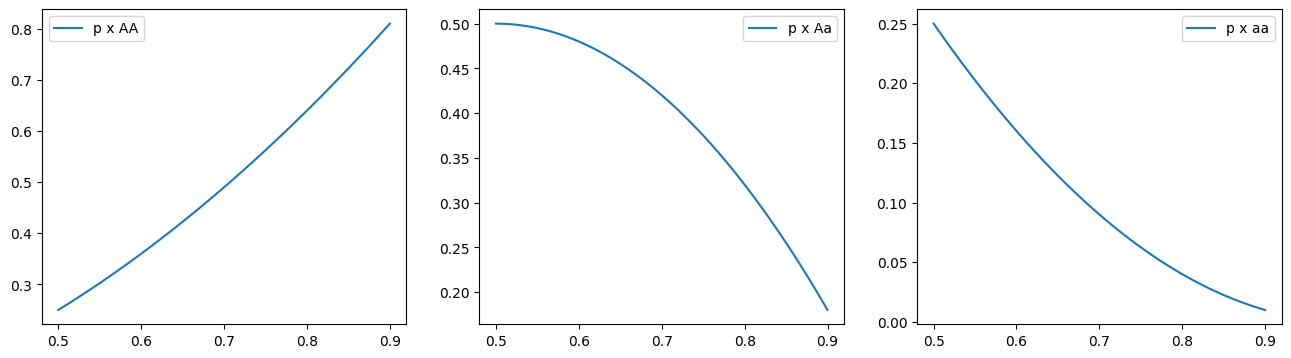

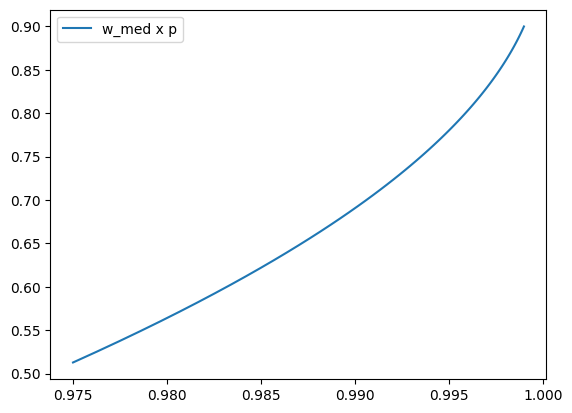

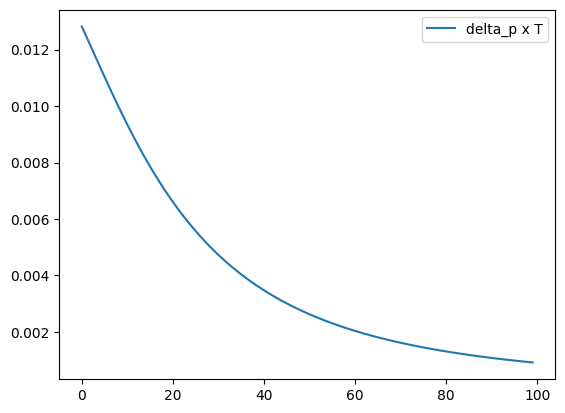

In [5]:
wAA = 1
wAa = 1
waa = 0.9

p0 = 0.5
q0 = 1 - p0

n_gen = int(100)

run(p0, q0, wAA, wAa, waa, n_gen)

# Mesmo gráfico com diferentes valores de P

# Caso 2:
- Codominância: wAa = (wAA + waa)/2


[0.01315789473684209, 0.013130596200043698, 0.01308531205418817, 0.013022327710867088, 0.012942022195497893, 0.012844863498187808, 0.012731402998345409, 0.012602269073397232, 0.012458160014242492, 0.012299836378888762, 0.012128112920955947, 0.011943850231451725, 0.011747946230563522, 0.011541327641440224, 0.01132494157040087, 0.011099747308122077, 0.010866708454579543, 0.010626785457334864, 0.01038092863864698, 0.01013007177231634, 0.009875126256570999, 0.009616975915063442, 0.00935647244449972, 0.00909443151484074, 0.008831629516611983, 0.008568800939777743, 0.008306636359979025, 0.008045781000730085, 0.007786833834412837, 0.007530347180553454, 0.0072768267568256995, 0.007026732136399788, 0.006780477564518134, 0.006538433087396517, 0.006300925947582137, 0.006068242201611507, 0.005840628518062302, 0.005618294116765038, 0.0054014128129052374, 0.005190125132911144, 0.004984540472283805, 0.00478473926881072, 0.004590775167844063, 0.004402677159461757, 0.004220451670327294, 0.0040440845958

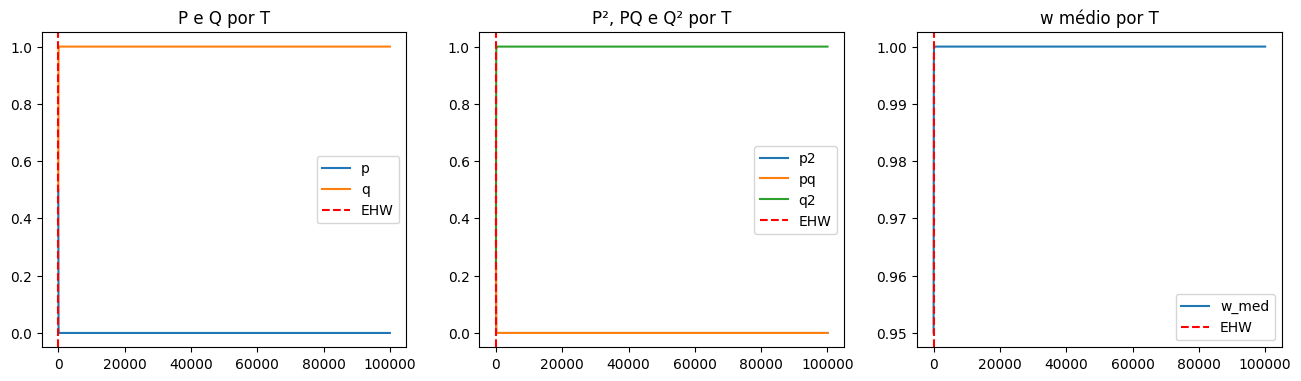

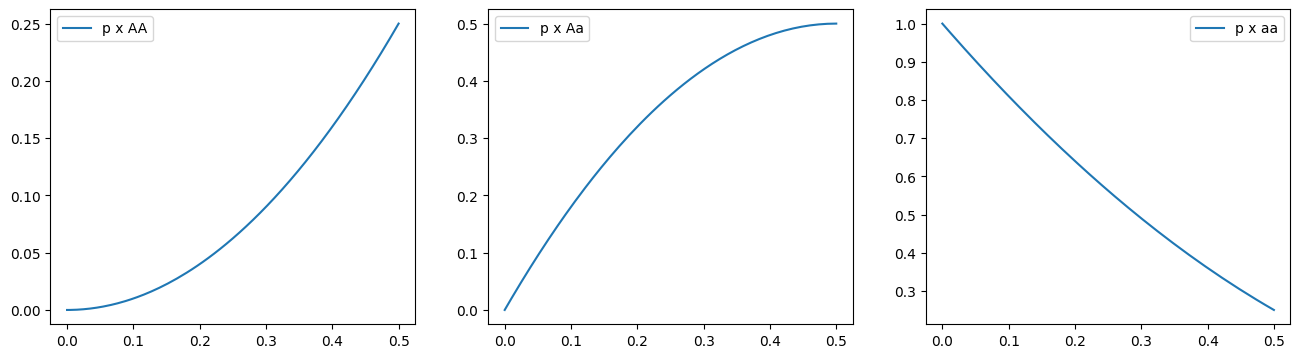

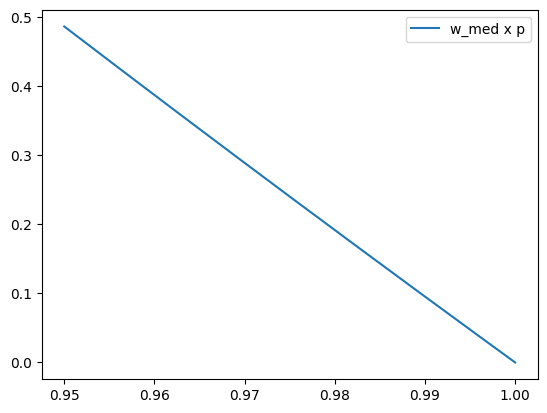

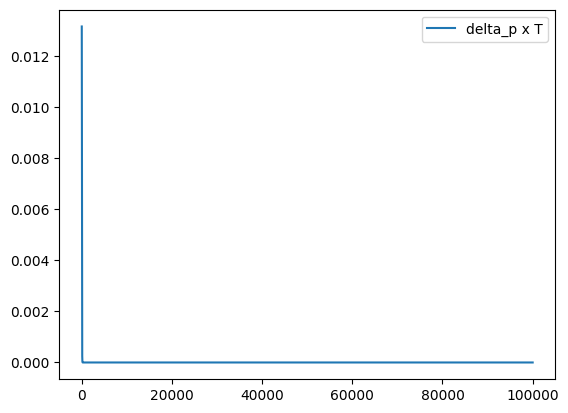

In [6]:
wAA = 0.9
waa = 1
wAa = (wAA + waa)/2

p0 = 0.5
q0 = 1 - p0

n_gen = int(1e5)

run(p0, q0, wAA, wAa, waa, n_gen)

# Caso 3:
- Sobredominância: wAA = 0,9; wAa = 1; waa = 0,9


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

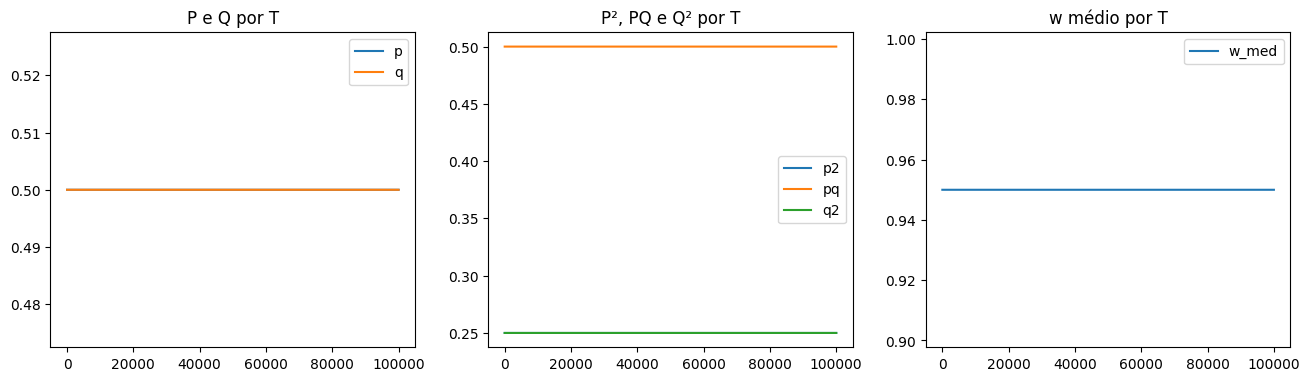

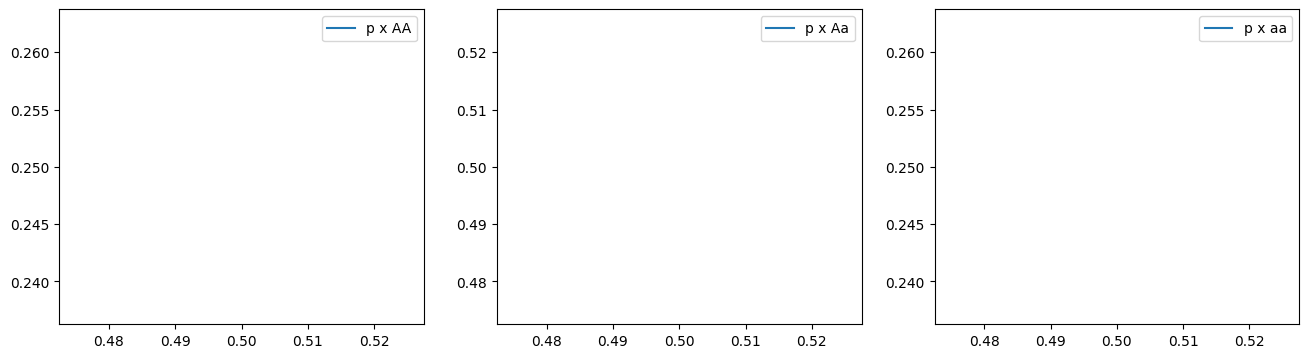

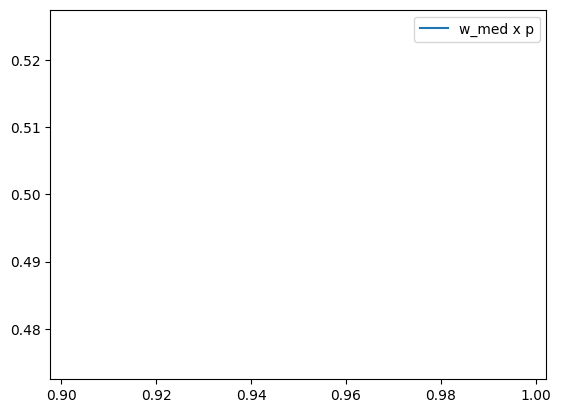

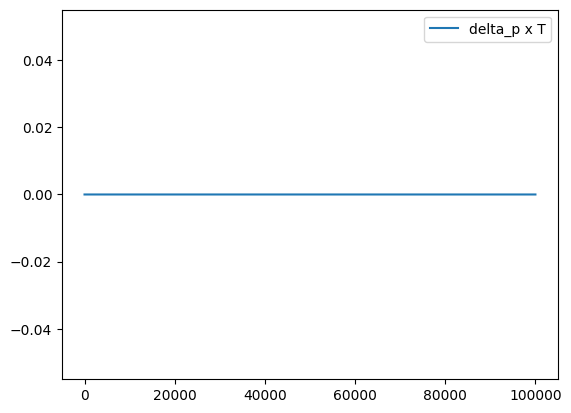

In [7]:
wAA = 0.9
wAa = 1
waa = 0.9

p0 = 0.5
q0 = 1 - p0

n_gen = int(1e5)

run(p0, q0, wAA, wAa, waa, n_gen)

# Caso 4:
- Desvantagem do heterozigoto: wAA = 1; wAa = 0,9; waa = 1

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


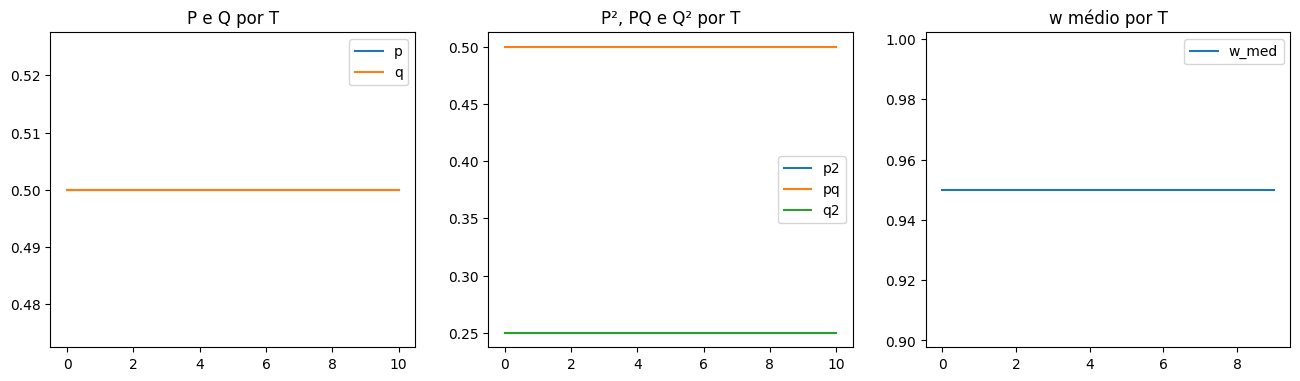

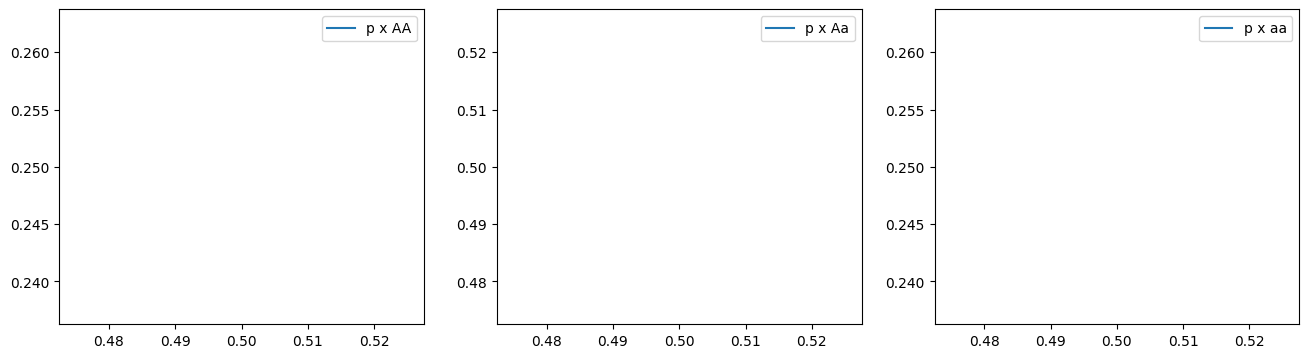

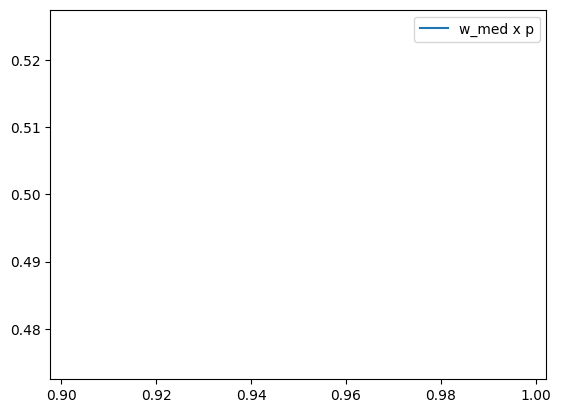

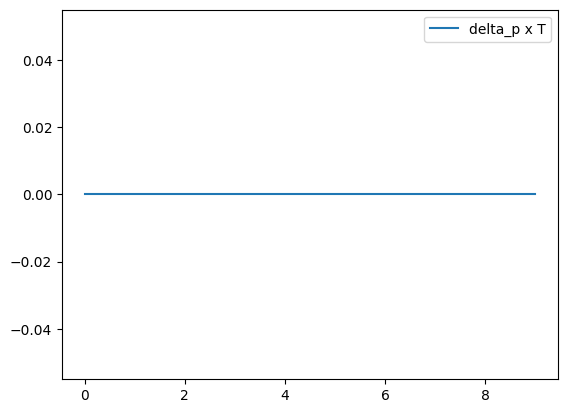

In [8]:
wAA = 1
wAa = 0.9
waa = 1

p0 = 0.5
q0 = 1 - p0

n_gen = int(10)

run(p0, q0, wAA, wAa, waa, n_gen)

# Testes Caso 1

Doing for p0:  0.3  and q0:  0.7
[0.015457413249211405, 0.015509040116362505, 0.015508419251546612, 0.01545797425775719, 0.015360742270348449, 0.015220244944383787, 0.015040357121665404, 0.01482517954547019, 0.014578920755707103, 0.014305791910009857, 0.01400991688930786, 0.013695258777483899, 0.013365562731848912, 0.013024314423897565, 0.012674712635335261, 0.012319654225843024, 0.01196172951439023, 0.011603226095665109, 0.011246139206638861, 0.010892186927745073, 0.01054282871643597, 0.010199286002388619, 0.009862563804378666, 0.009533472545810717, 0.00921264944111011, 0.00890057899459451, 0.008597612295925927, 0.00830398491264528, 0.008019833272725263, 0.007745209501360928, 0.007480094729373166, 0.007224410928709957, 0.006978031356409842, 0.006740789704597794, 0.006512488062808464, 0.006292903802044392, 0.006081795488971586, 0.0058789079347851825, 0.005683976477486308, 0.005496730589351184, 0.005316896893802103, 0.005144201668122572, 0.00497837290078329, 0.004819141964774842, 0.0046

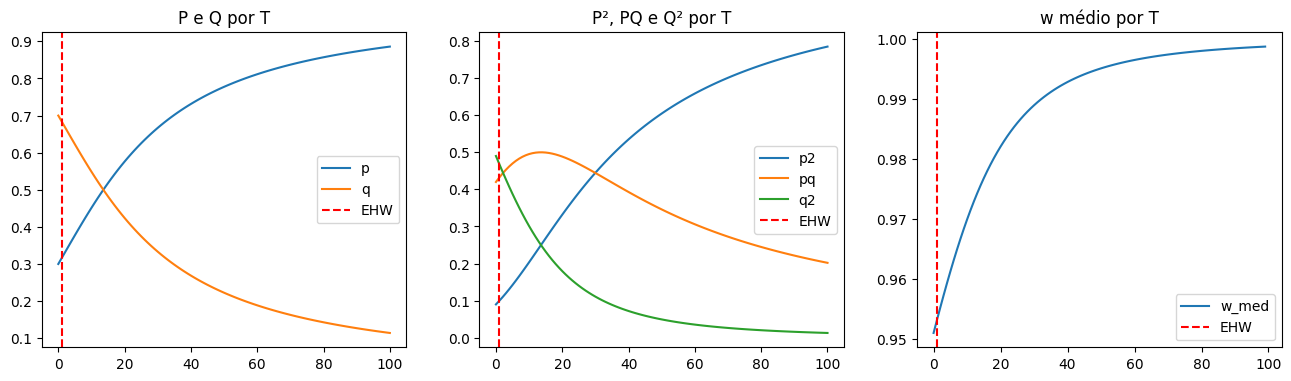

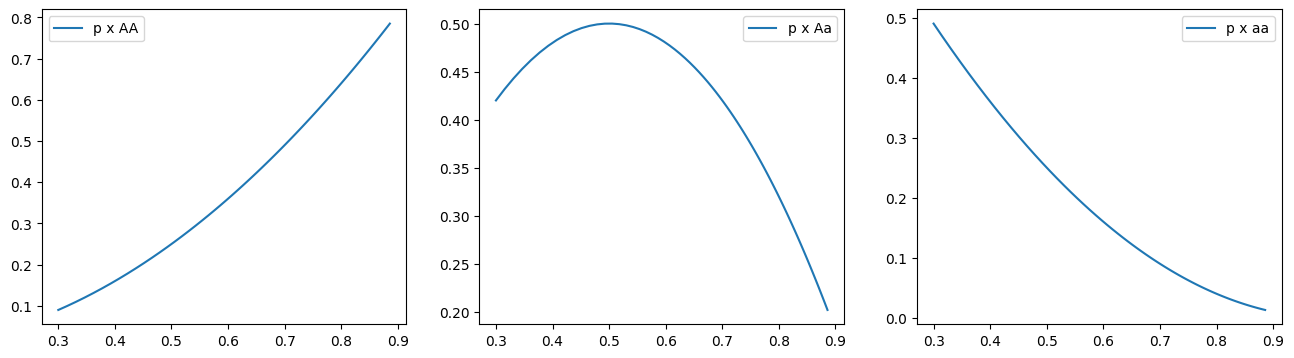

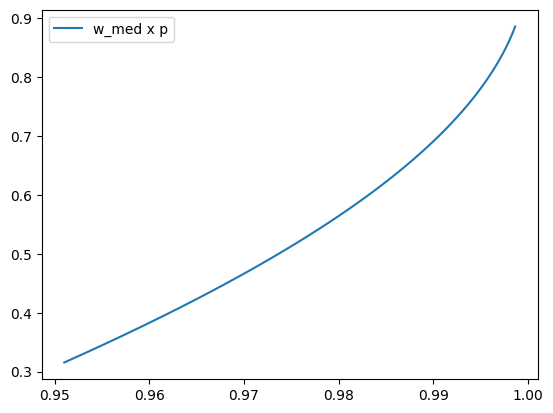

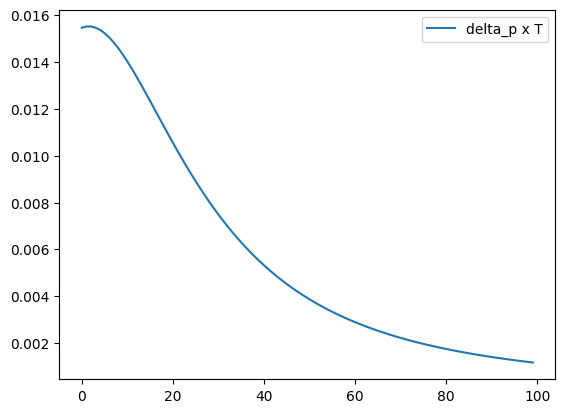

Doing for p0:  0.4  and q0:  0.6
[0.014937759336099643, 0.014706634161116672, 0.014446522542323148, 0.01416160256753457, 0.013855926504920957, 0.013533355469841801, 0.013197510164799586, 0.012851736547306702, 0.012499084801333993, 0.012142299720298455, 0.011783820516625632, 0.011425788114060476, 0.011070058114466708, 0.010718217825679166, 0.01037160596207698, 0.010031333862655756, 0.009698307296582276, 0.009373248133112355, 0.009056715335474808, 0.008749124894378069, 0.008450768446128465, 0.008161830424556205, 0.007882403677500482, 0.007612503540514348, 0.00735208040577251, 0.00710103085586411, 0.006859207452938665, 0.006626427285915892, 0.0064024793841996885, 0.0061871311072321244, 0.00598013361666716, 0.005781226533010275, 0.005590141872120702, 0.0054066073496480405, 0.0052303491337644115, 0.005061094118798182, 0.00489857178483577, 0.004742515701175676, 0.004592664724827666, 0.0044487639390692335, 0.004310565371457575, 0.004177828525624094, 0.00405032075663736, 0.003927817515687493, 

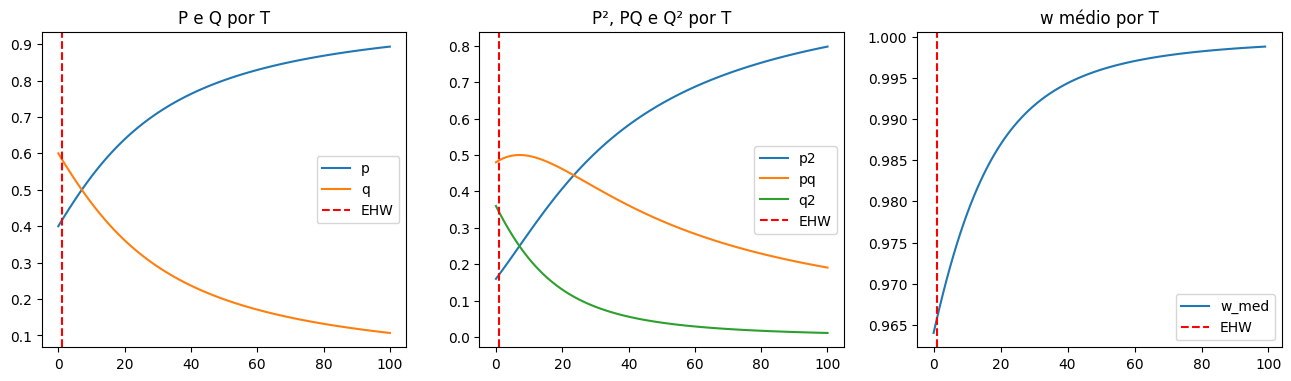

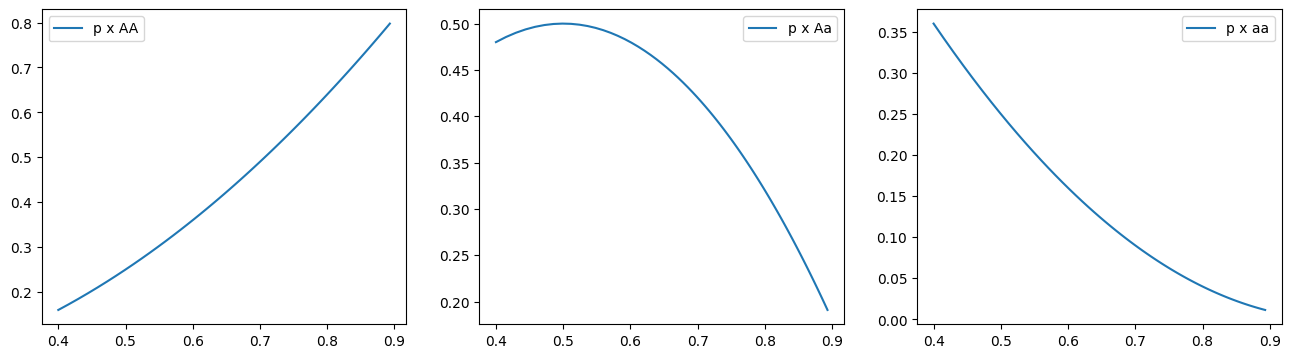

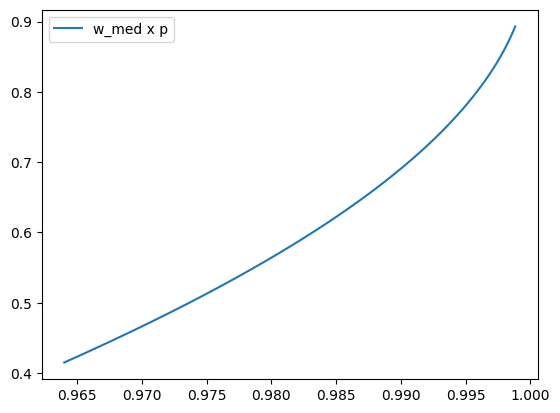

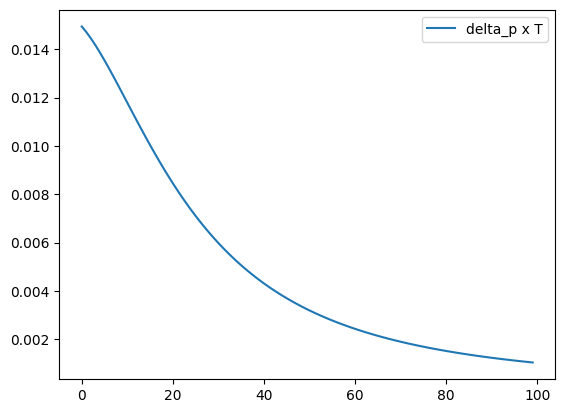

Doing for p0:  0.5  and q0:  0.5
[0.012820512820512886, 0.012467385354448468, 0.012110354512774979, 0.011751832505015436, 0.01139393420356083, 0.011038490535127399, 0.010687065800010775, 0.010340977551553165, 0.010001317901207174, 0.009668975338489205, 0.009344656360048553, 0.009028906382476665, 0.008722129567117598, 0.008424607312158106, 0.00813651526934589, 0.007857938822362631, 0.007588887024186919, 0.007329305034765032, 0.007079085130937801, 0.006838076380493163, 0.006606093083808107, 0.006382922091769605, 0.006168329109210169, 0.005962064090274777, 0.005763865827044579, 0.005573465826185564, 0.005390591561017399, 0.0052149691786677055, 0.0050463257342361345, 0.00488439101637228, 0.0047288990215420545, 0.004579589127593042, 0.004436207011115023, 0.004298505347515524, 0.0041662443277104, 0.004039192020839577, 0.003917124608420752, 0.0037998265118314167, 0.0036870904319055153, 0.003578717316712776, 0.003474516271224637, 0.0033743044205066797, 0.003277906736299907, 0.00318515583530576

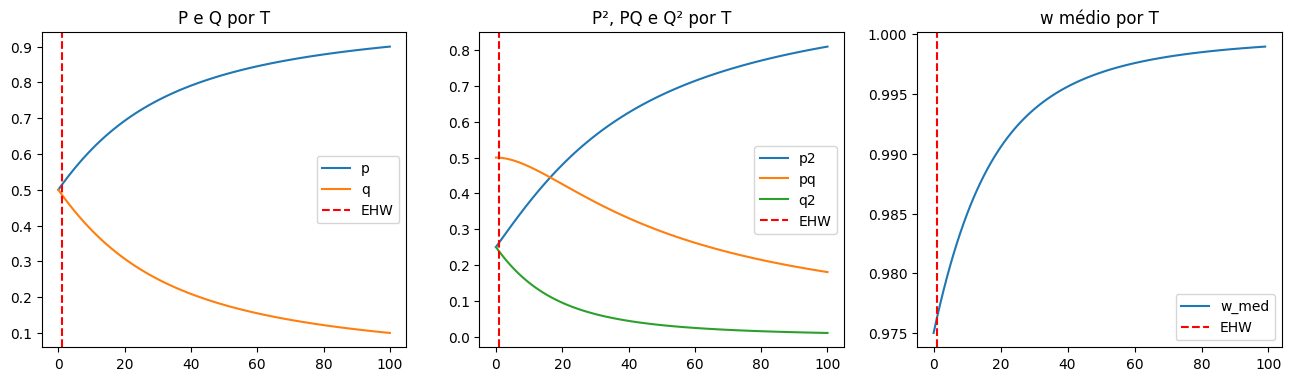

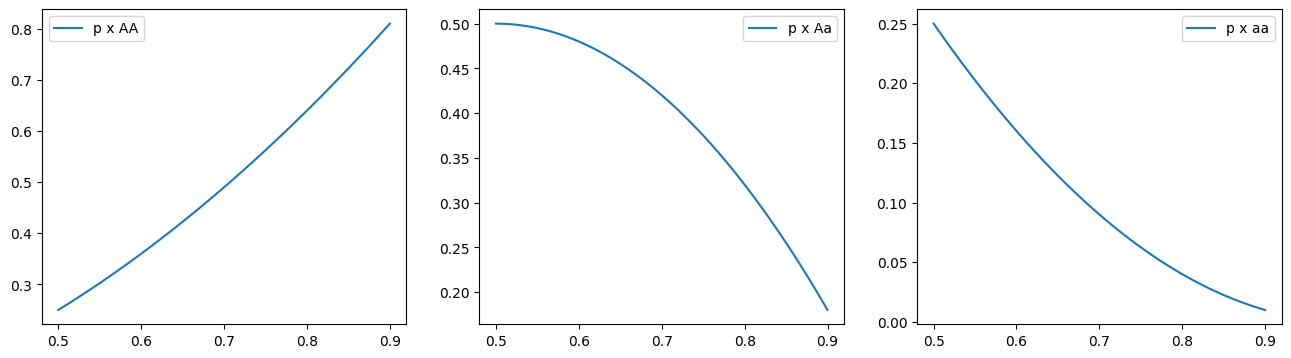

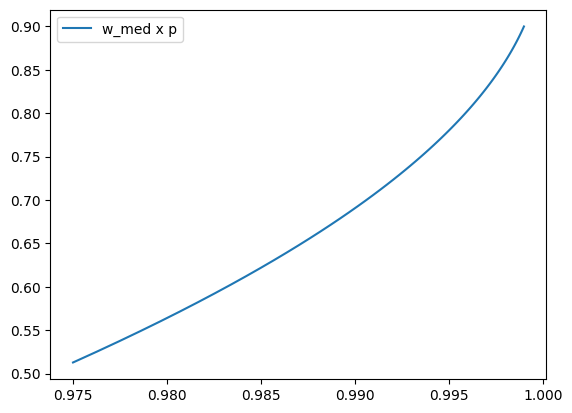

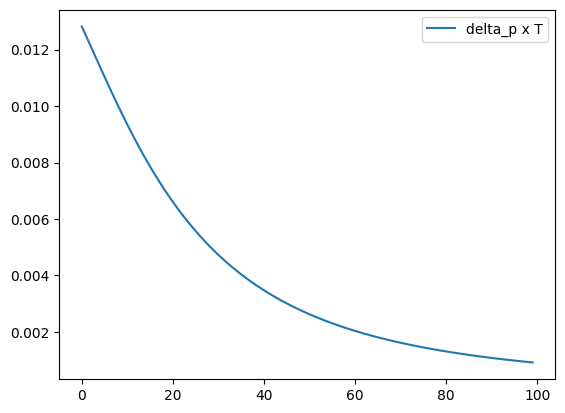

Doing for p0:  0.6000000000000001  and q0:  0.3999999999999999
[0.009756097560975618, 0.009429597739253892, 0.009111537229207878, 0.00880235568603105, 0.008502365251381039, 0.008211767969229289, 0.007930671673412992, 0.007659104329989286, 0.00739702686549637, 0.007144344546114456, 0.0069009169952293226, 0.006666566950492392, 0.006441087868200968, 0.006224250484466065, 0.006015808440593018, 0.005815503075516926, 0.005623067481897226, 0.005438229915268766, 0.005260716637970675, 0.005090254271809869, 0.0049265717258228925, 0.004769401758246472, 0.004618482225027254, 0.0044735570609215625, 0.0043343770335319, 0.0042007003054534975, 0.004072292835074931, 0.003948928642461658, 0.003830389963096592, 0.0037164673090465117, 0.003606959454308223, 0.0035016733586286097, 0.0034004240419589493, 0.0033030344198470285, 0.0032093351084748756, 0.003119164206659586, 0.0030323670609562203, 0.002948796018978239, 0.0028683101751793005, 0.002790775112601618, 0.002716062643456696, 0.002644050550869359, 0.002

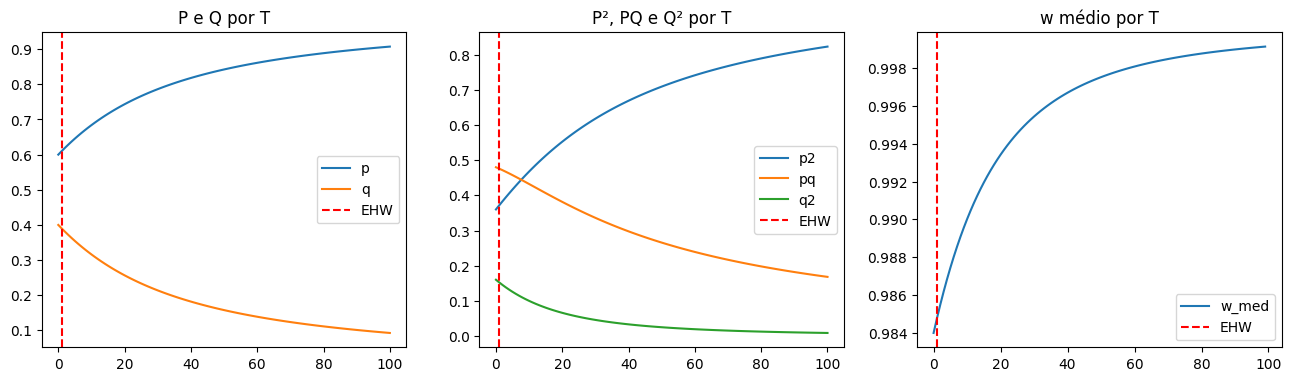

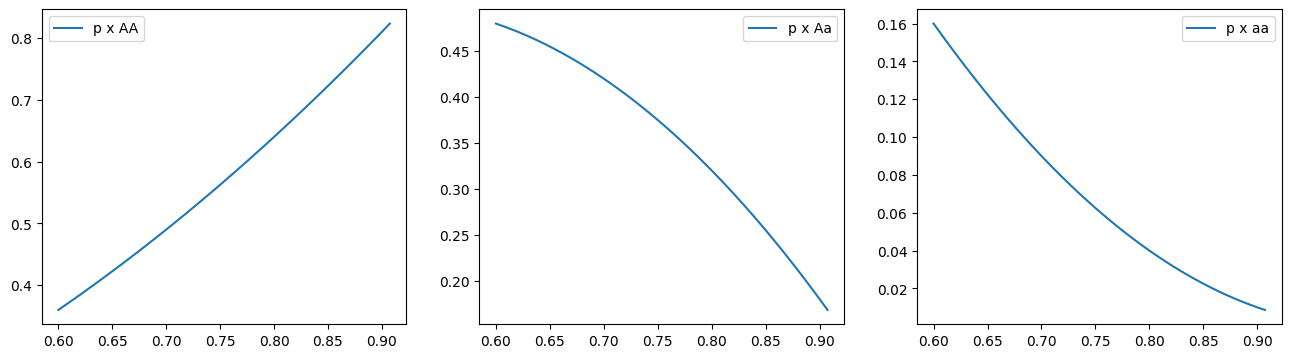

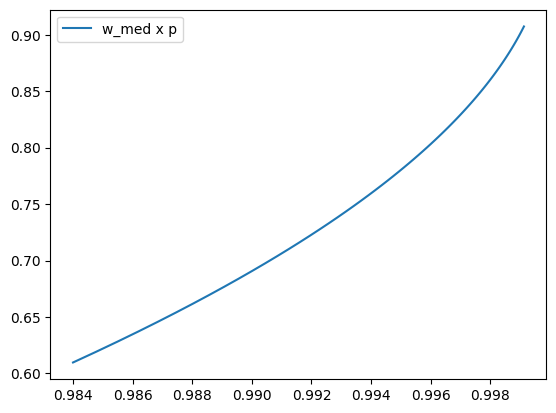

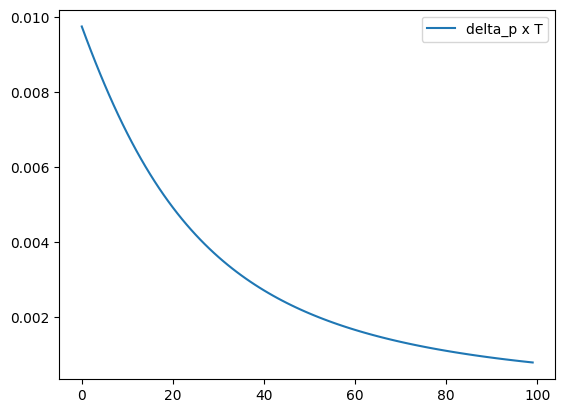

Doing for p0:  0.7000000000000002  and q0:  0.2999999999999998
[0.006357214934409661, 0.006143615734534813, 0.005938314242062148, 0.005741048202786425, 0.005551548490815628, 0.0053695422924943115, 0.005194755754280189, 0.005026916165597584, 0.004865753740211587, 0.004711003052582319, 0.004562404179068502, 0.004419703587783541, 0.0042826548154115684, 0.0041510189643223505, 0.004024565048902362, 0.0039030702160756103, 0.0037863198615193383, 0.0036741076600173006, 0.003566235525728656, 0.0034625135158143916, 0.0033627596888387012, 0.003266799927613917, 0.0031744677346381422, 0.0030856040069727753, 0.003000056796289896, 0.0029176810588525948, 0.0028383383993795253, 0.0027618968120390885, 0.002688230421225568, 0.0026172192242679415, 0.0025487488377887724, 0.002482710249075981, 0.0024189995735254266, 0.0023575178189552126, 0.002298170657386689, 0.0022408682047031503, 0.002185524808459016, 0.0021320588439839305, 0.0020803925188360717, 0.0020304516855720323, 0.0019821656627430073, 0.0019354670

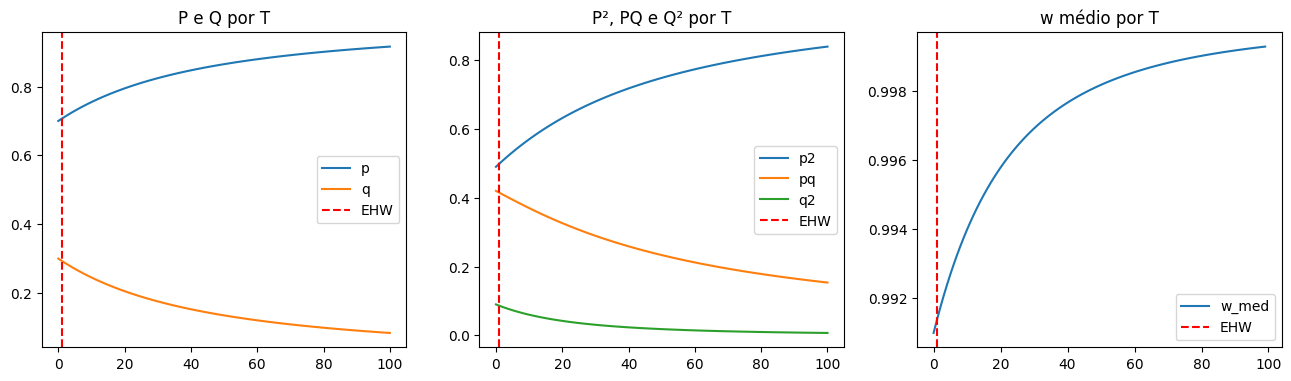

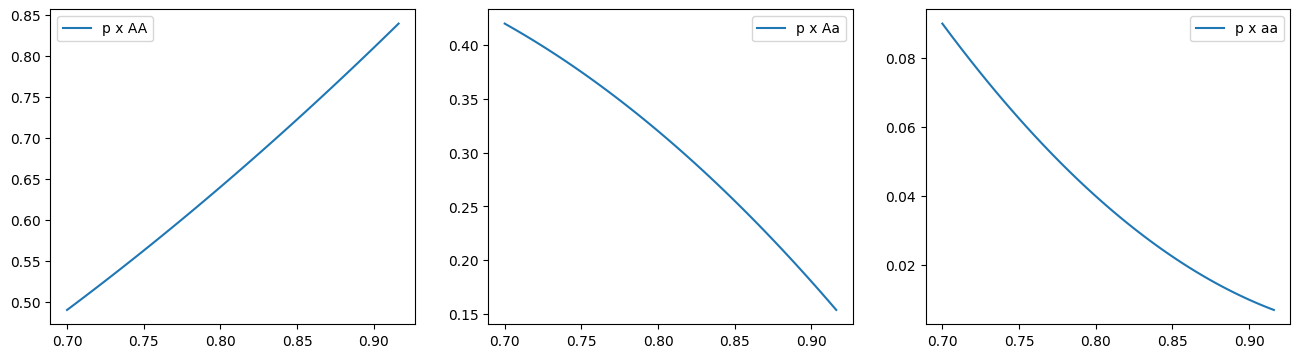

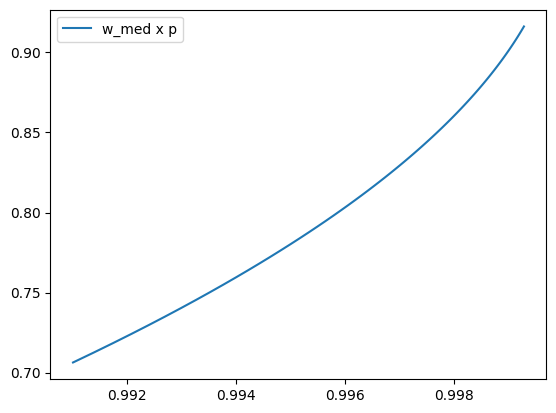

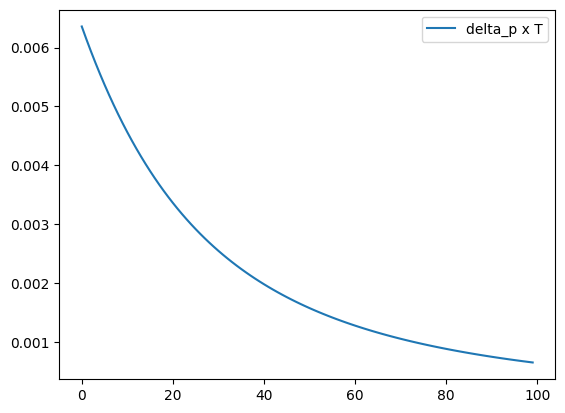

In [15]:
wAA = 1
wAa = 1
waa = 0.9

p0_list = [i for i in np.arange(0.3, 0.8, 0.1)]
q0_list = [1 - p0 for p0 in p0_list]

n_gen = int(100)

for p0, q0 in zip(p0_list, q0_list):
    print("Doing for p0: ", p0, " and q0: ", q0)
    run(p0, q0, wAA, wAa, waa, n_gen)

# Testes Caso 2

Doing for p0:  0.3  and q0:  0.7
[0.010824742268041254, 0.010583700844322197, 0.010336892153778032, 0.010085246418802596, 0.009829670520137307, 0.009571042911275807, 0.009310209181436241, 0.009047978270933815, 0.008785119331605001, 0.008522359215105774, 0.00826038056349987, 0.007999820469611257, 0.007741269669108347, 0.007485272222174738, 0.007232325639802084, 0.006982881408118258, 0.006737345863605304, 0.006496081372432655, 0.006259407768294478, 0.006027604004956472, 0.005800909982052765, 0.005579528505403386, 0.005363627346132369, 0.0051533413660534155, 0.004948774680061108, 0.004750002829547406, 0.004557074944087566, 0.004370015871756144, 0.00418882826140049, 0.004013494582984806, 0.003843979074702228, 0.0036802296079206515, 0.0035221794631734443, 0.0033697490123293233, 0.0032228473037784894, 0.003081373548963033, 0.0029452185098695557, 0.0028142657882011674, 0.0026883930178713544, 0.002567472963224973, 0.0024513745260099987, 0.002339963664609007, 0.0022331042294102127, 0.0021306587

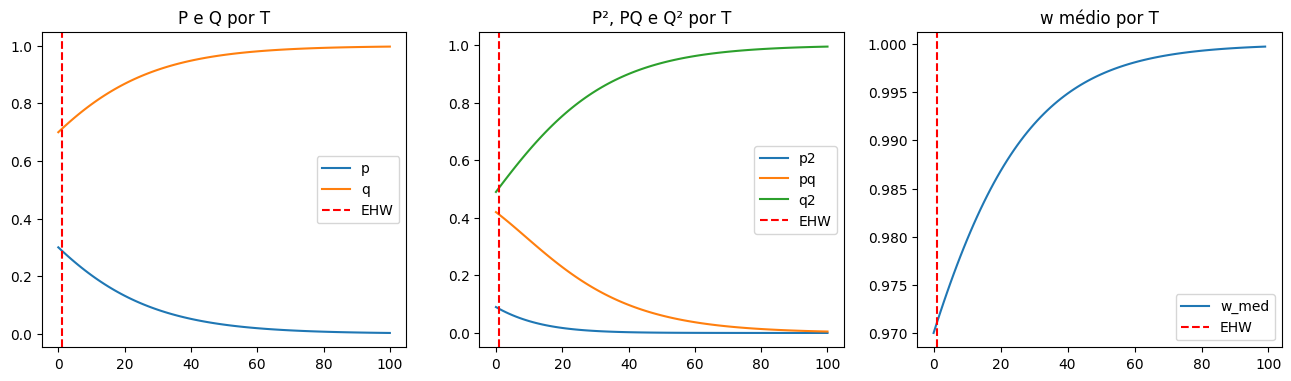

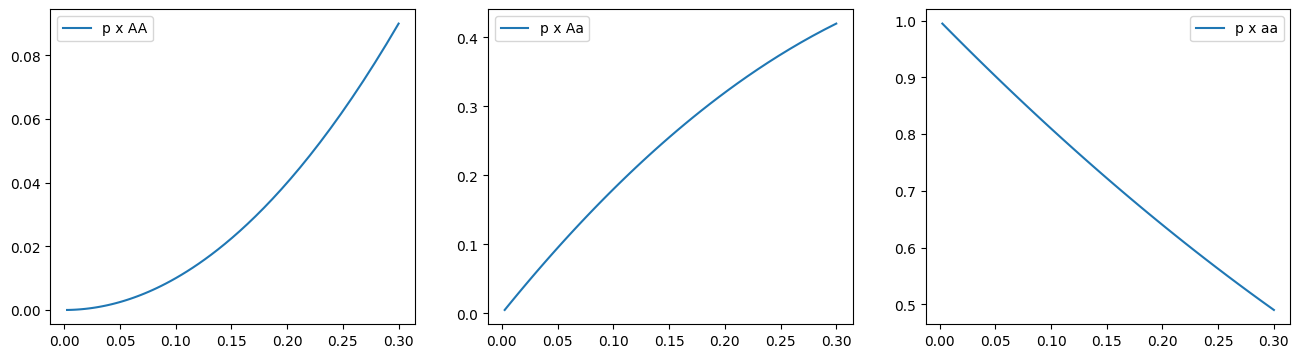

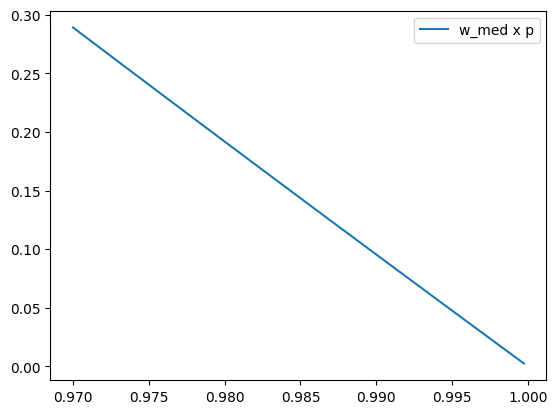

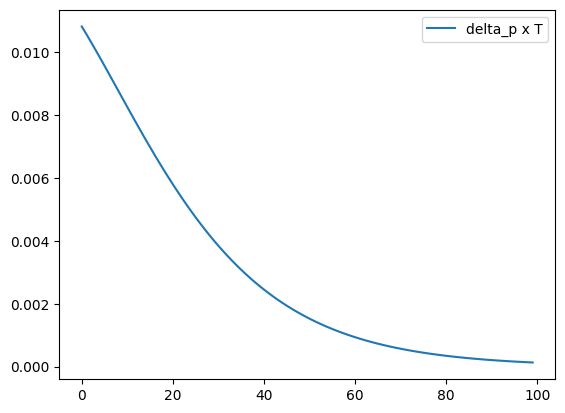

Doing for p0:  0.4  and q0:  0.6
[0.012499999999999956, 0.012345578673602087, 0.012177524281795193, 0.011996685427970222, 0.01180395043569199, 0.011600238814607366, 0.011386492798823367, 0.011163669075285487, 0.010932730808396185, 0.010694640054270232, 0.010450350644126694, 0.010200801601828957, 0.009946911145950477, 0.009689571312368361, 0.009429643219615175, 0.009167952986342875, 0.008905288298500902, 0.00864239561336913, 0.008379977978523662, 0.008118693436201335, 0.007859153977371386, 0.007601925005081028, 0.0073475252632448085, 0.00709642718489184, 0.0068490576128573954, 0.006605798845867705, 0.006366989963785985, 0.006132928387323183, 0.00590387162962927, 0.005680039199747106, 0.00546161462080616, 0.005248747528949618, 0.005041555822233201, 0.004840127832018218, 0.004644524492640731, 0.004454781488308371, 0.0042709113592180326, 0.004092905551757495, 0.003920736400334288, 0.00375435903084137, 0.003593713178018945, 0.0034387249109947143, 0.003289308263088417, 0.003145366763553009, 

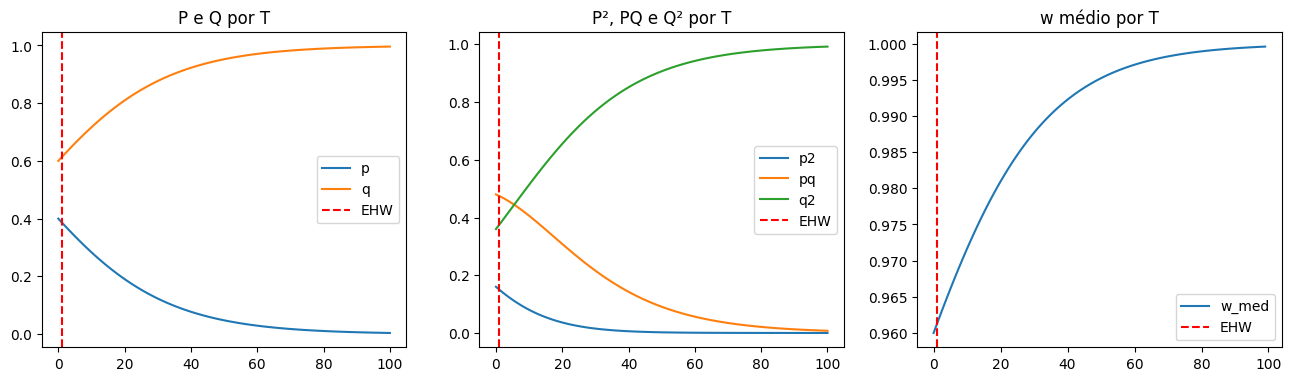

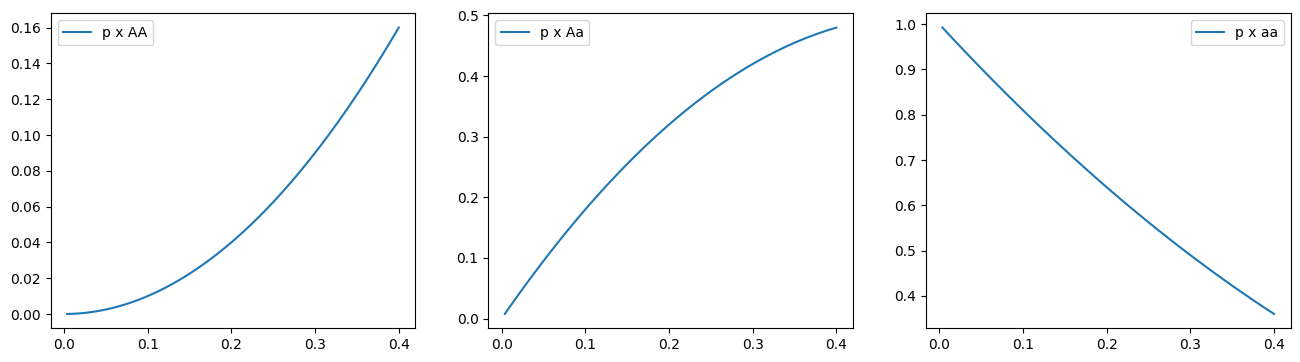

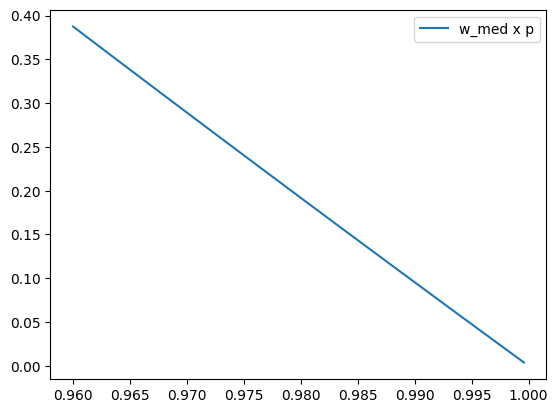

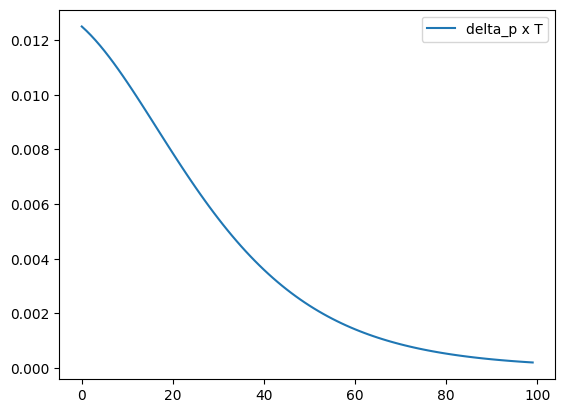

Doing for p0:  0.5  and q0:  0.5
[0.01315789473684209, 0.013130596200043698, 0.01308531205418817, 0.013022327710867088, 0.012942022195497893, 0.012844863498187808, 0.012731402998345409, 0.012602269073397232, 0.012458160014242492, 0.012299836378888762, 0.012128112920955947, 0.011943850231451725, 0.011747946230563522, 0.011541327641440224, 0.01132494157040087, 0.011099747308122077, 0.010866708454579543, 0.010626785457334864, 0.01038092863864698, 0.01013007177231634, 0.009875126256570999, 0.009616975915063442, 0.00935647244449972, 0.00909443151484074, 0.008831629516611983, 0.008568800939777743, 0.008306636359979025, 0.008045781000730085, 0.007786833834412837, 0.007530347180553454, 0.0072768267568256995, 0.007026732136399788, 0.006780477564518134, 0.006538433087396517, 0.006300925947582137, 0.006068242201611507, 0.005840628518062302, 0.005618294116765038, 0.0054014128129052374, 0.005190125132911144, 0.004984540472283805, 0.00478473926881072, 0.004590775167844063, 0.004402677159461757, 0.00

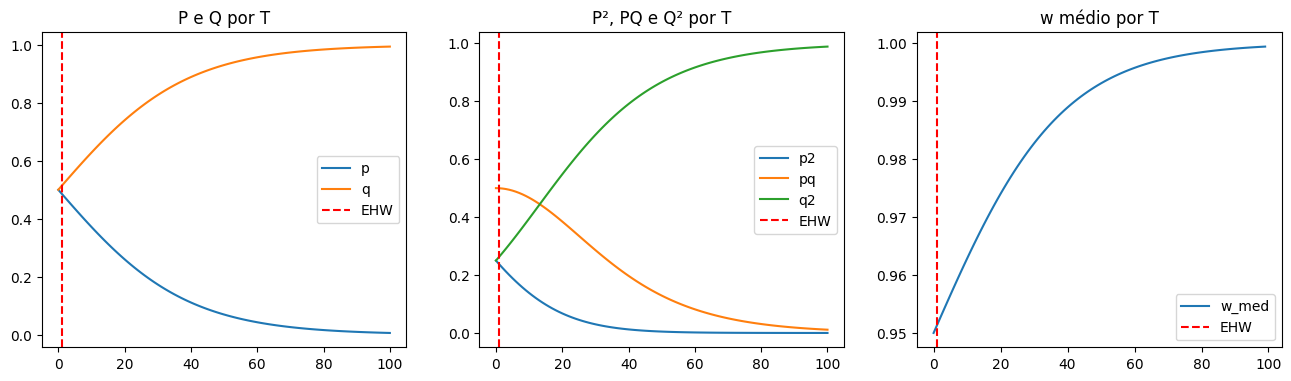

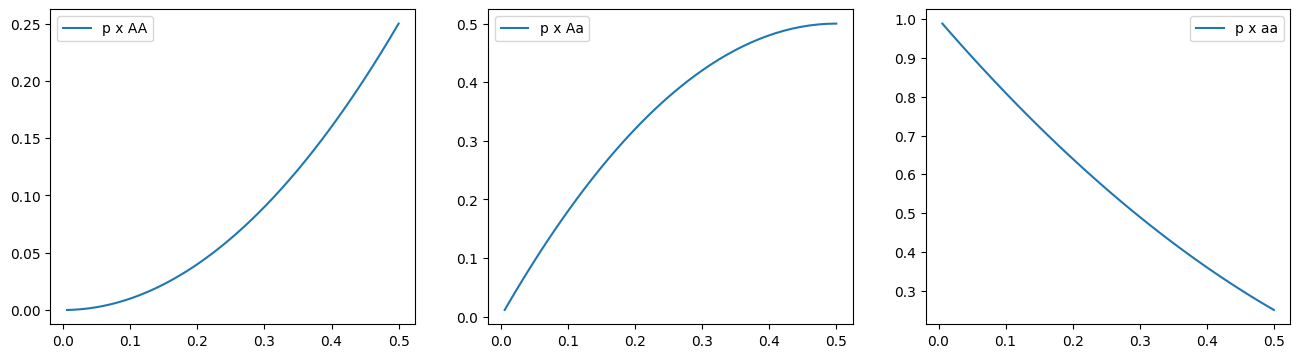

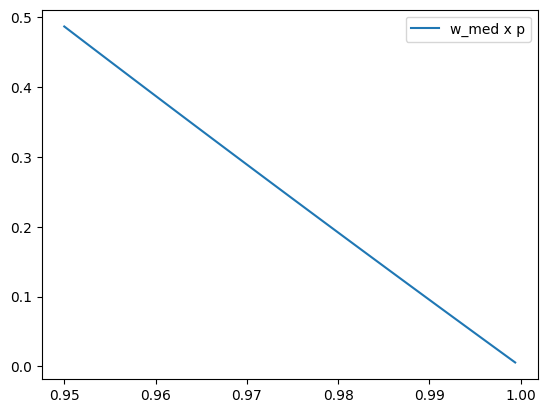

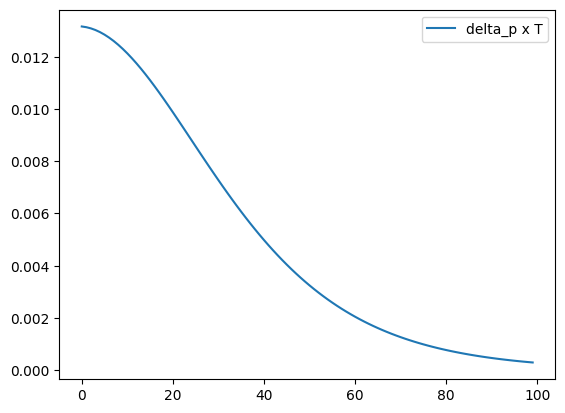

Doing for p0:  0.6000000000000001  and q0:  0.3999999999999999
[0.012765957446808418, 0.012875610788349867, 0.01296839169279207, 0.013043830819651436, 0.013101550772699921, 0.013141270168780306, 0.013162806604023025, 0.013166078463118902, 0.013151105540503139, 0.013118008466343811, 0.01306700695434665, 0.012998416911839505, 0.012912646474695255, 0.012810191049730024, 0.012691627464733402, 0.012557607340791588, 0.012408849812752809, 0.012246133731349307, 0.0120702894845931, 0.011882190576674168, 0.011682745099899083, 0.01147288722950457, 0.011253568862848173, 0.011025751513927096, 0.010790398561901782, 0.01054846793876163, 0.010300905326964205, 0.01004863792325389, 0.009792568810340602, 0.009533571964069926, 0.009272487910450156, 0.009010120034680102, 0.008747231533325933, 0.008484542991169935, 0.008222730556055602, 0.007962424678322533, 0.007704209376121873, 0.007448621983983106, 0.0071961533393627986, 0.006947248360446606, 0.006702306968056709, 0.006461685305013509, 0.0062256972075646

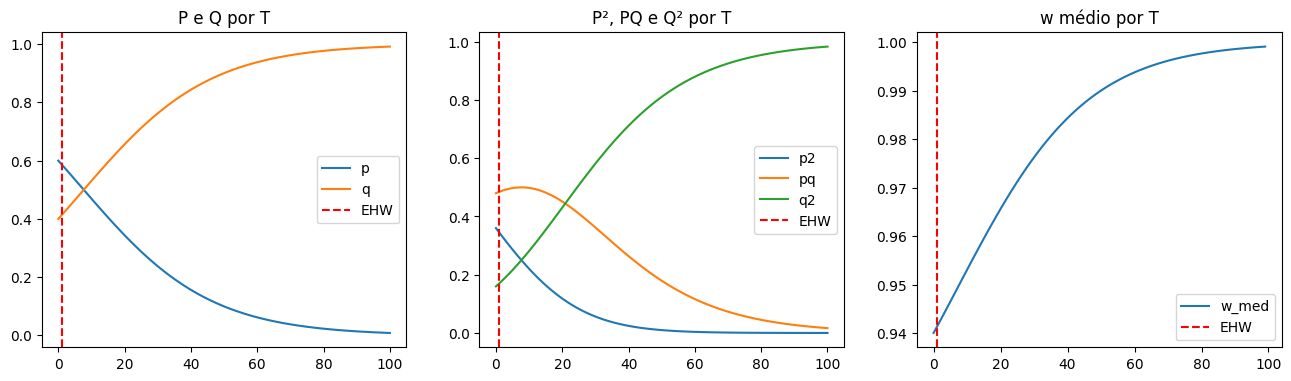

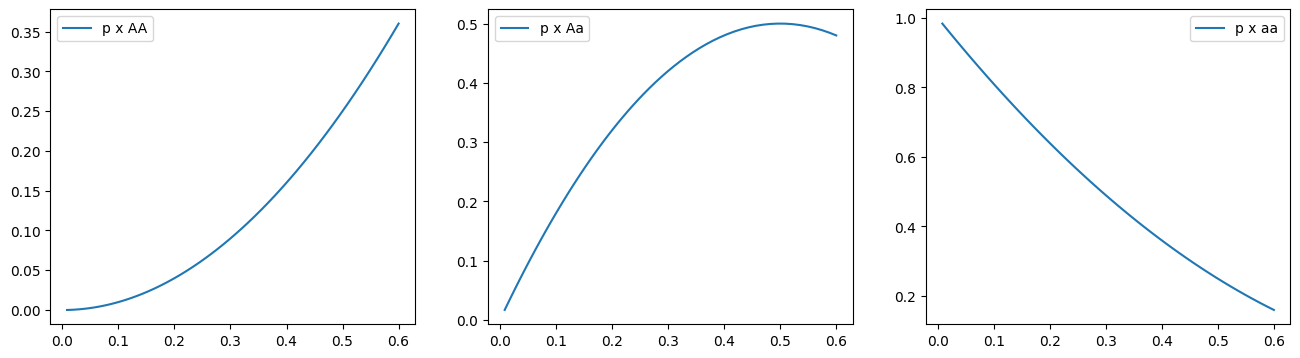

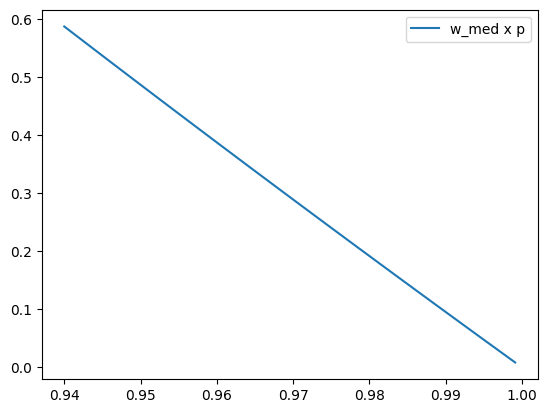

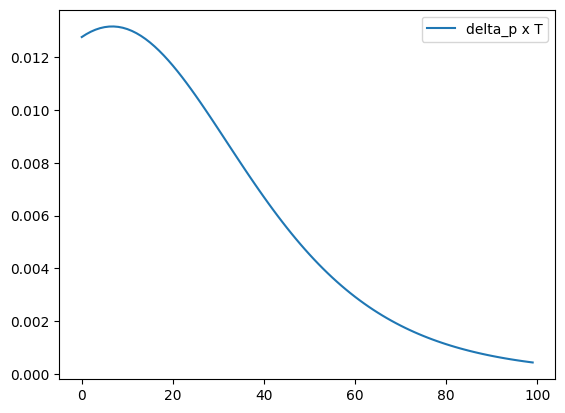

Doing for p0:  0.7000000000000002  and q0:  0.2999999999999998
[0.011290322580645107, 0.011512295837687092, 0.011724000652375, 0.01192446972881367, 0.012112765033376438, 0.012287986711935539, 0.0124492819265285, 0.01259585346874692, 0.012726968004970973, 0.012841963809987367, 0.012940257850668435, 0.013021352090244798, 0.013084838896159634, 0.01313040545023858, 0.013157837078579981, 0.013167019439598193, 0.013157939531446672, 0.013130685503896566, 0.013085445283913755, 0.013022504047931815, 0.012942240596421573, 0.012845122707157097, 0.012731701561975728, 0.012602605357355634, 0.012458532221416685, 0.012300242568772268, 0.01212855102990873, 0.011944318093497441, 0.011748441598390447, 0.011541848207291039, 0.011325484986554946, 0.011100311206703573, 0.010867290466453516, 0.010627383229887988, 0.010381539852285349, 0.010130694155548736, 0.009875757599580592, 0.009617614081706916, 0.009357115382703285, 0.00909507726539413, 0.008832276220385266, 0.008569446843411654, 0.008307279820117308, 

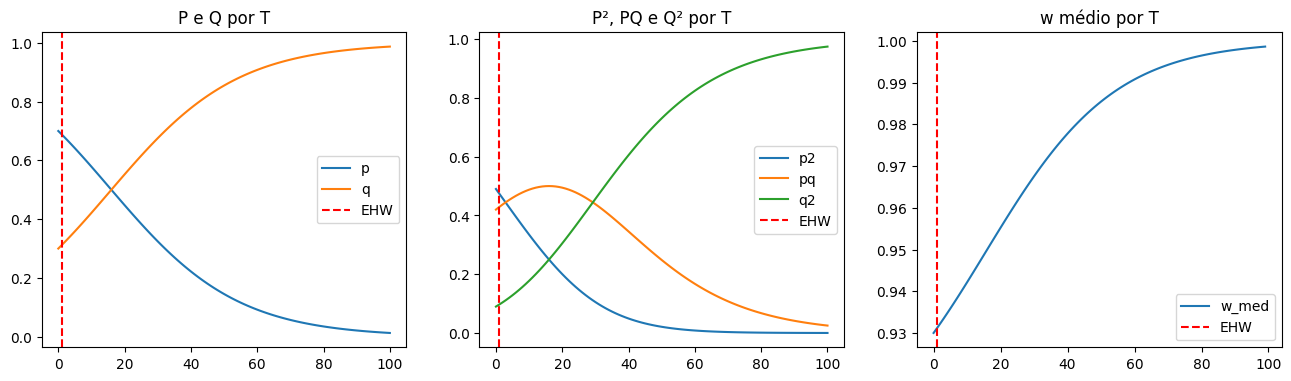

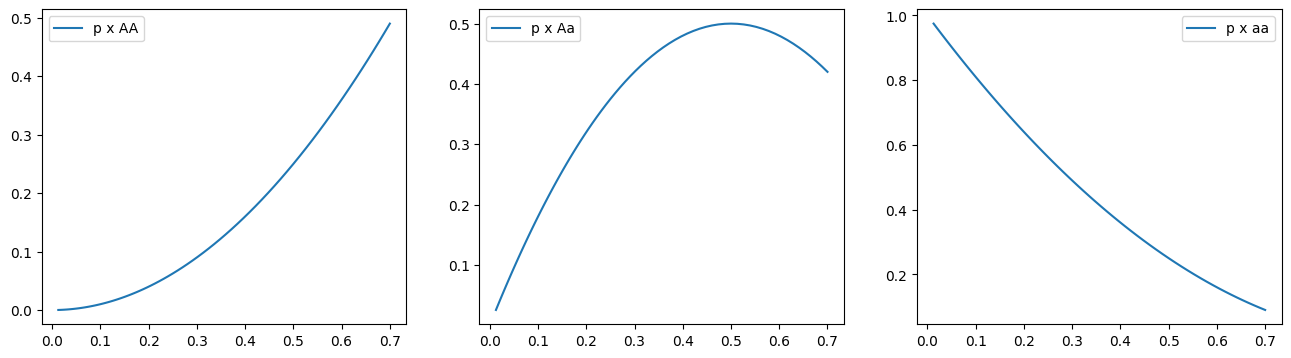

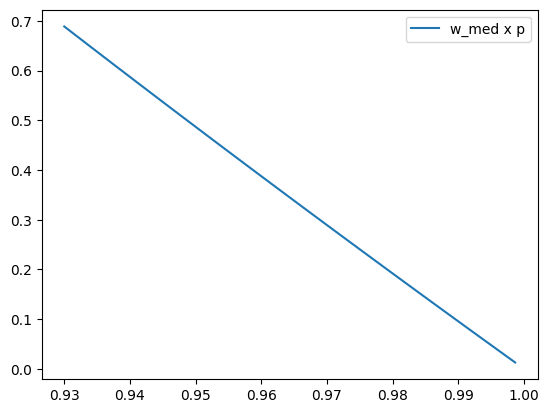

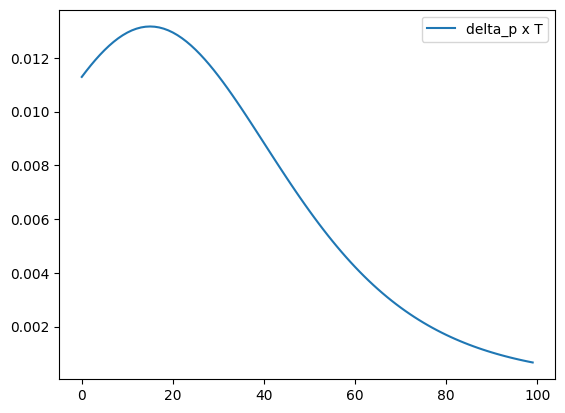

In [16]:
wAA = 0.9
waa = 1
wAa = (wAA + waa)/2

p0_list = [i for i in np.arange(0.3, 0.8, 0.1)]
q0_list = [1 - p0 for p0 in p0_list]

n_gen = int(100)

for p0, q0 in zip(p0_list, q0_list):
    print("Doing for p0: ", p0, " and q0: ", q0)
    run(p0, q0, wAA, wAa, waa, n_gen)

# Teste Caso 3

Doing for p0:  0.3  and q0:  0.7
[0.008917197452229353, 0.008654688219266682, 0.008382057445923852, 0.008102049131241795, 0.007817178531194569, 0.007529718521059825, 0.007241694734243909, 0.006954887871454596, 0.0066708416223880684, 0.006390874763464671, 0.006116096161179252, 0.005847421598117963, 0.005585591529970901, 0.005331189064507802, 0.00508465761956467, 0.004846317862306493, 0.004616383654804379, 0.004394976831636421, 0.004182140715338845, 0.003977852337377685, 0.0037820333784365223, 0.0035945598748381435, 0.00341527076028747, 0.0032439753260646853, 0.0030804596902312964, 0.0029244923689634716, 0.0027758290421339704, 0.002634216601791861, 0.0024993965670894736, 0.0023711079431211757, 0.0022490895945542766, 0.002133082198211844, 0.002022829832155182, 0.0019180812524824953, 0.0018185909031247505, 0.0017241196984341123, 0.0016344356133597415, 0.0015493141114918396, 0.0014685384372111754, 0.0013918997945938094, 0.0013191974325462152, 0.0012502386528635556, 0.0011848387554643236, 0.

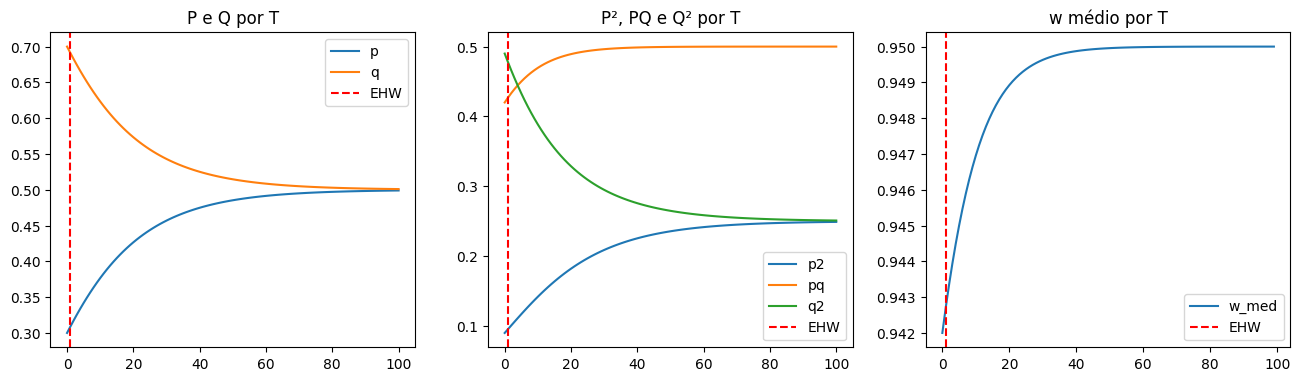

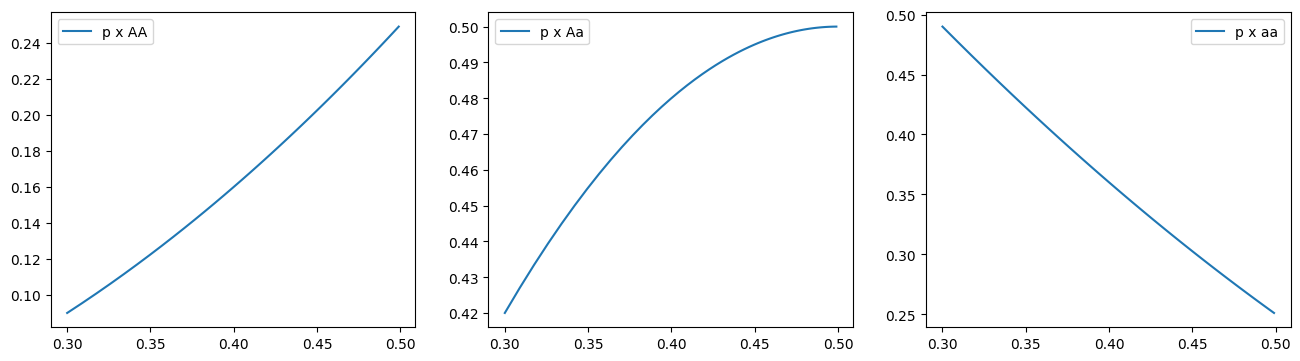

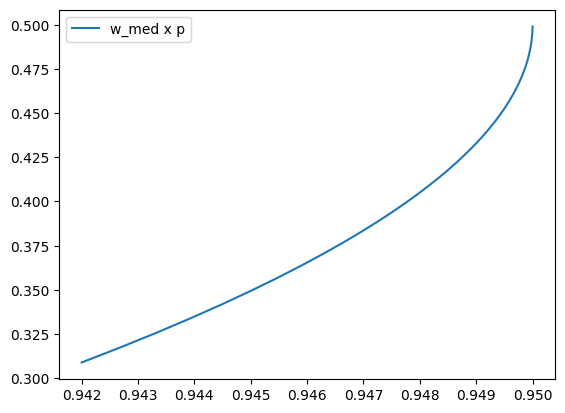

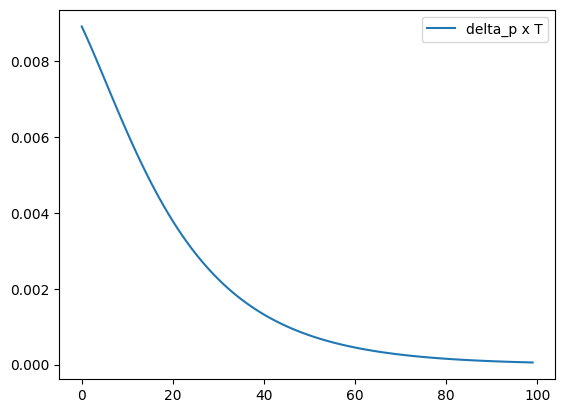

Doing for p0:  0.4  and q0:  0.6
[0.005063291139240533, 0.004825685997146945, 0.004596500652600144, 0.004375849486704886, 0.004163769499161141, 0.003960232415096798, 0.0037651555141914317, 0.003578411231276779, 0.0033998355991421425, 0.0032292356175636083, 0.003066395639521824, 0.002911082867759207, 0.0027630520535771863, 0.0026220494861285415, 0.0024878163552477517, 0.0023600915647170595, 0.0022386140662580267, 0.0021231247778148443, 0.0020133681431079298, 0.0019090933831314438, 0.001810055484373685, 0.0017160159630950078, 0.0016267434400402125, 0.0015420140554894823, 0.0014616117505522608, 0.001385328437056521, 0.0013129640752491678, 0.0012443266757687366, 0.001179232239948036, 0.0011175046504054986, 0.0010589755220699604, 0.0010034840222106767, 0.0009508766666923574, 0.0009010070985104868, 0.0008537358536645501, 0.0008089301185757458, 0.0007664634825265138, 0.0007262156879822568, 0.0006880723811268918, 0.0006519248645051601, 0.0006176698532809888, 0.0005852092363113903, 0.0005544498

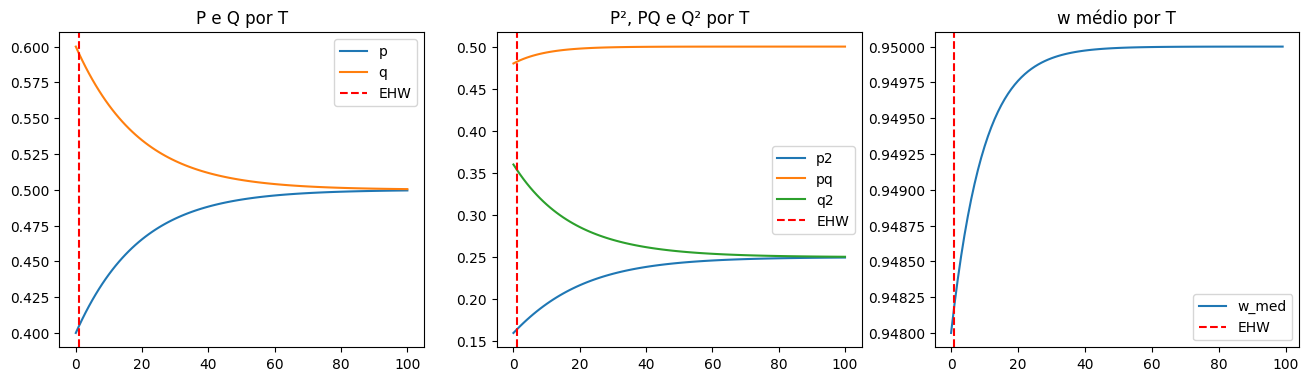

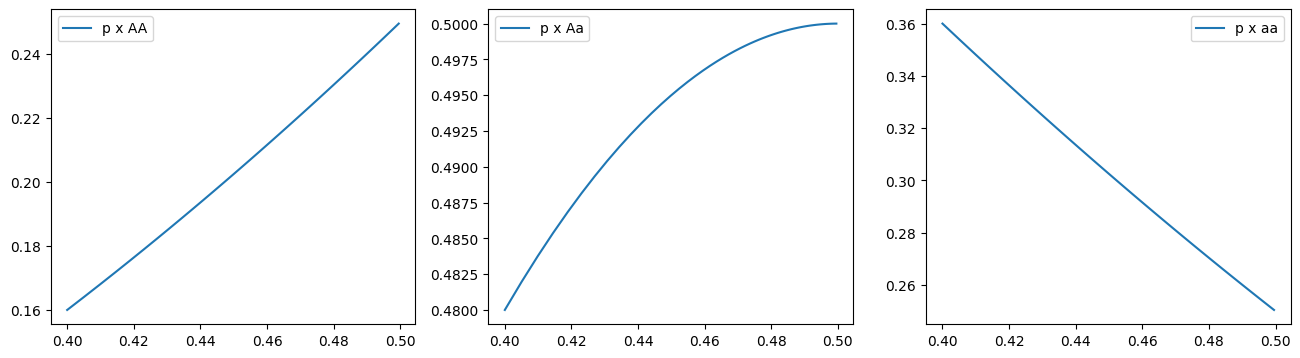

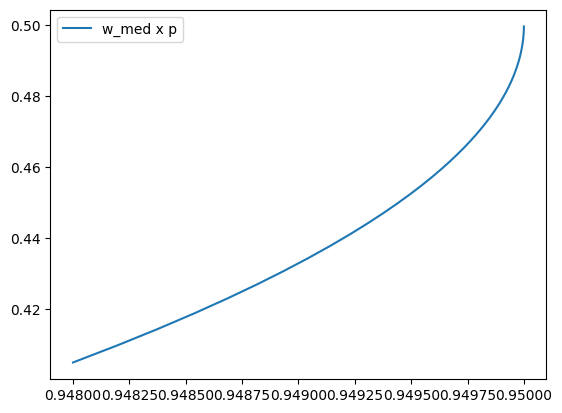

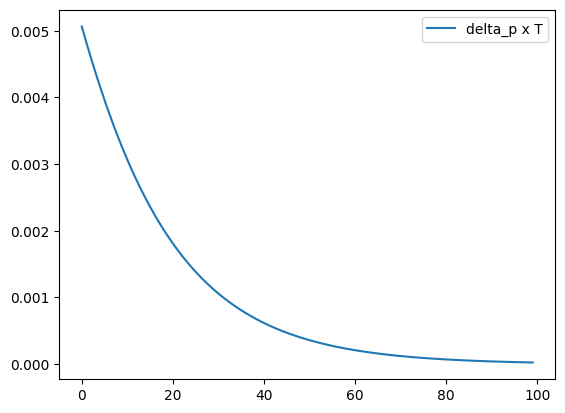

Doing for p0:  0.5  and q0:  0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


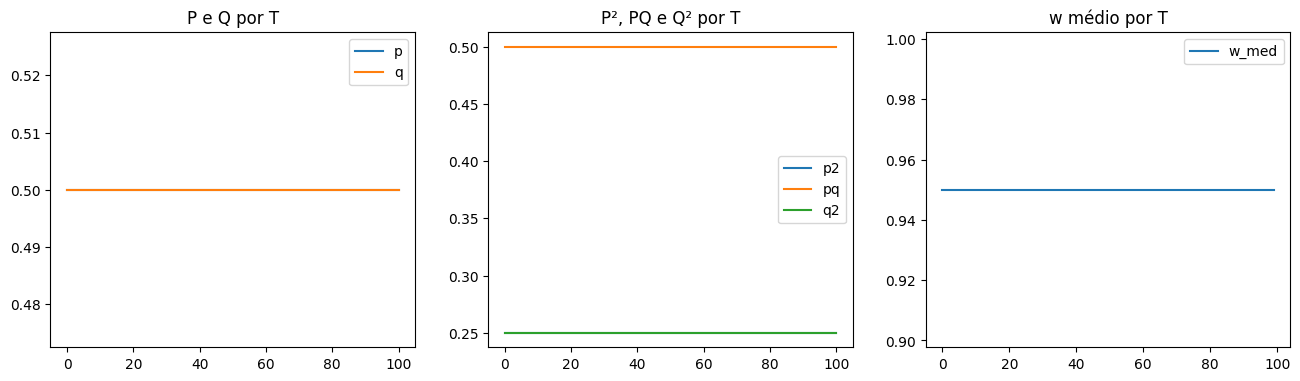

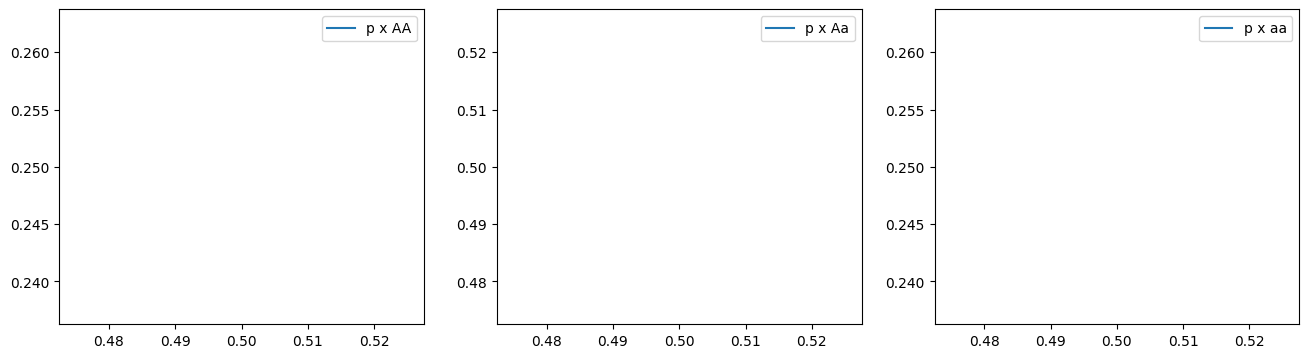

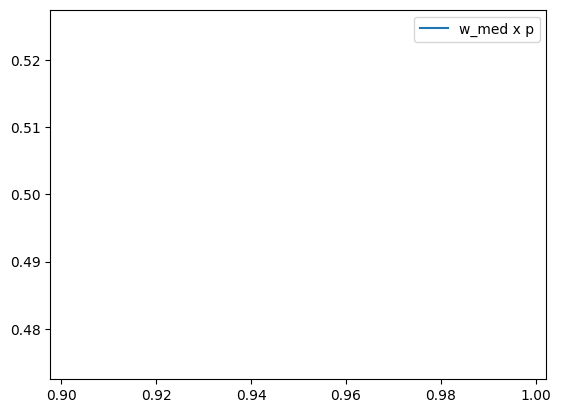

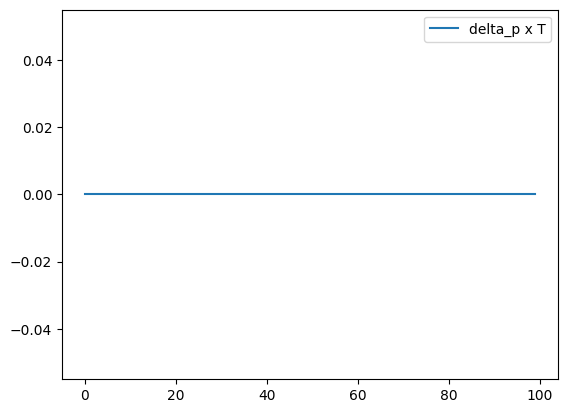

Doing for p0:  0.6000000000000001  and q0:  0.3999999999999999
[0.005063291139240422, 0.004825685997146945, 0.0045965006526001995, 0.004375849486704775, 0.004163769499161085, 0.003960232415096798, 0.0037651555141913207, 0.00357841123127689, 0.0033998355991420315, 0.0032292356175636083, 0.003066395639521824, 0.002911082867759207, 0.0027630520535772973, 0.0026220494861286525, 0.0024878163552477517, 0.0023600915647170595, 0.0022386140662580267, 0.0021231247778148443, 0.0020133681431079298, 0.0019090933831314993, 0.0018100554843736294, 0.0017160159630950078, 0.0016267434400402125, 0.0015420140554895934, 0.0014616117505522608, 0.001385328437056521, 0.0013129640752491678, 0.001244326675768792, 0.0011792322399480915, 0.0011175046504054986, 0.0010589755220699049, 0.0010034840222107322, 0.0009508766666923574, 0.0009010070985104868, 0.000853735853664439, 0.0008089301185756348, 0.0007664634825265138, 0.0007262156879822568, 0.0006880723811268918, 0.0006519248645051601, 0.0006176698532809333, 0.000

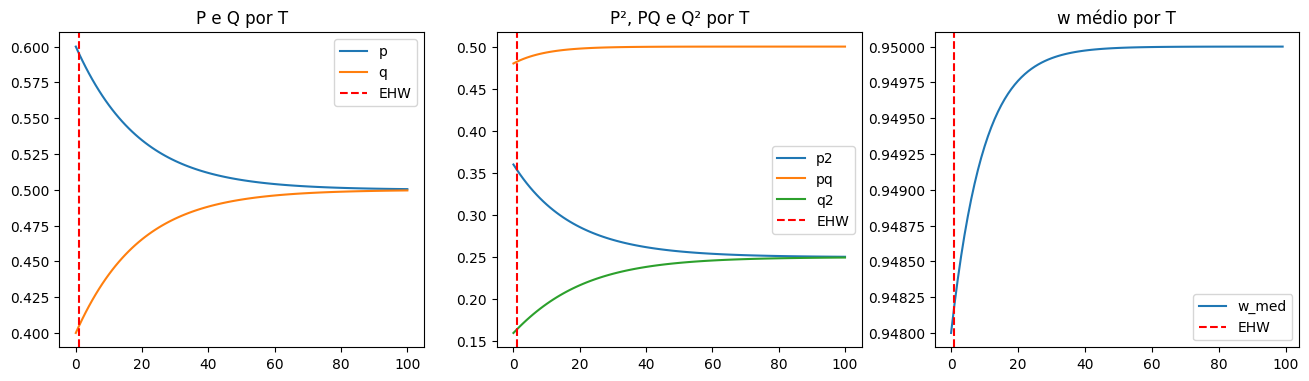

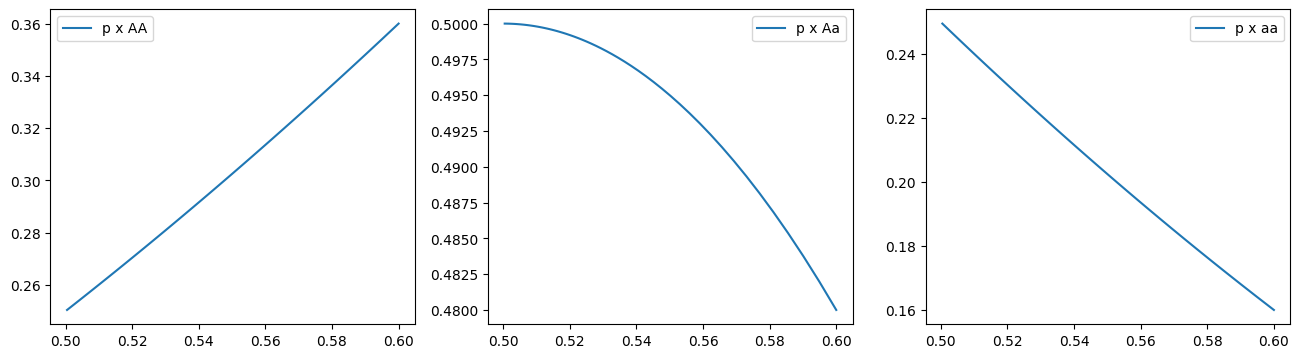

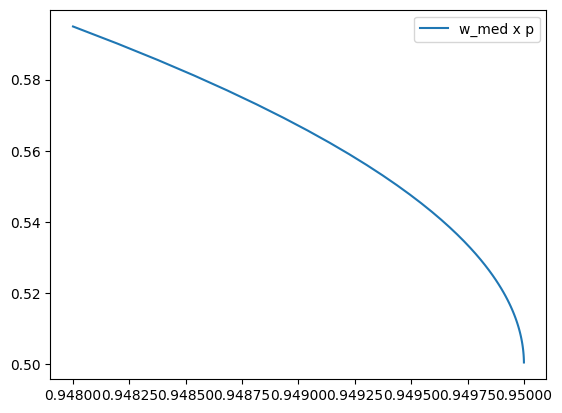

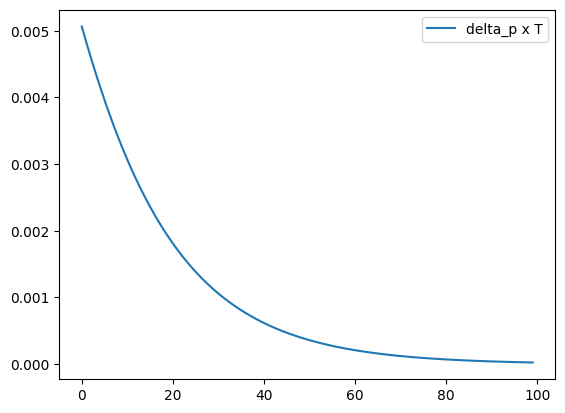

Doing for p0:  0.7000000000000002  and q0:  0.2999999999999998
[0.008917197452229297, 0.008654688219266737, 0.008382057445923907, 0.008102049131241795, 0.007817178531194569, 0.0075297185210597695, 0.007241694734243853, 0.006954887871454707, 0.0066708416223881795, 0.00639087476346456, 0.006116096161179141, 0.005847421598118019, 0.005585591529971068, 0.005331189064507802, 0.00508465761956467, 0.004846317862306382, 0.0046163836548043236, 0.004394976831636477, 0.004182140715338845, 0.003977852337377685, 0.0037820333784366333, 0.0035945598748381435, 0.00341527076028747, 0.0032439753260646853, 0.0030804596902311854, 0.002924492368963416, 0.002775829042133915, 0.002634216601791861, 0.002499396567089529, 0.002371107943121342, 0.0022490895945542766, 0.002133082198211844, 0.002022829832155182, 0.0019180812524824953, 0.0018185909031248615, 0.0017241196984341123, 0.0016344356133597415, 0.0015493141114918396, 0.0014685384372112864, 0.001391899794593754, 0.0013191974325461597, 0.0012502386528634446,

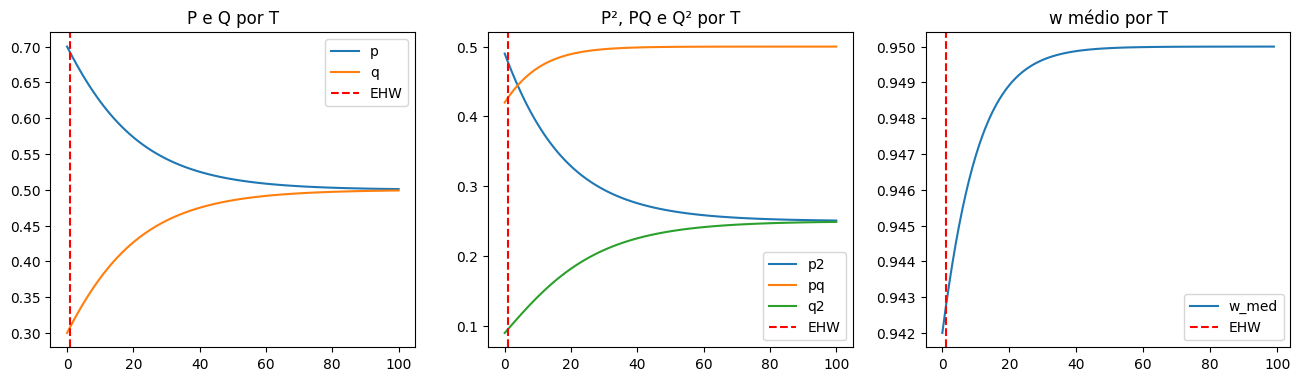

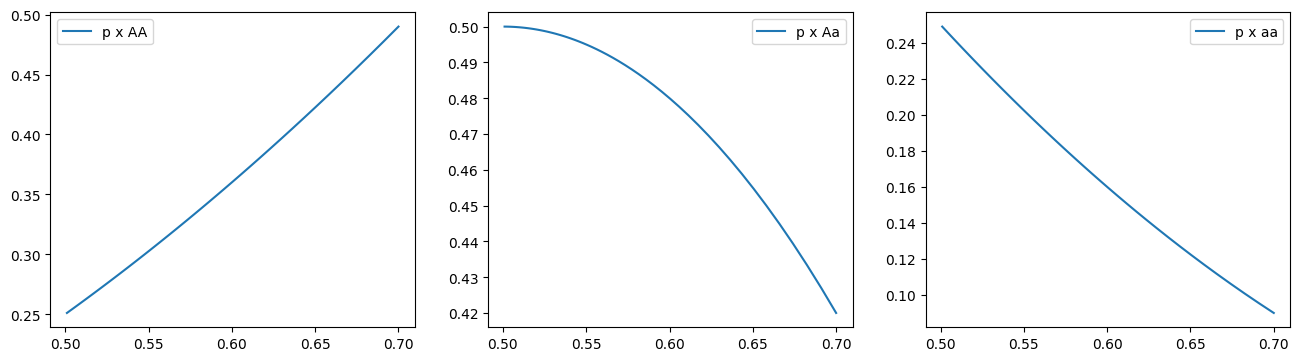

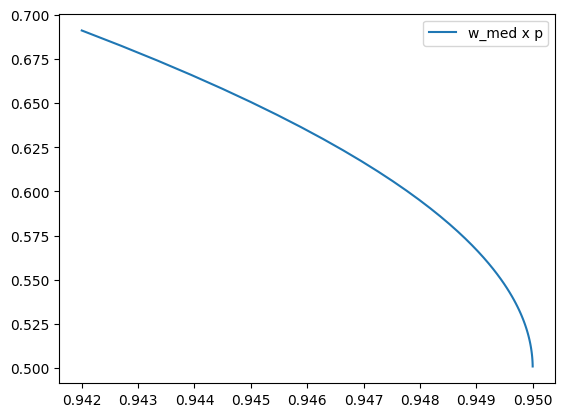

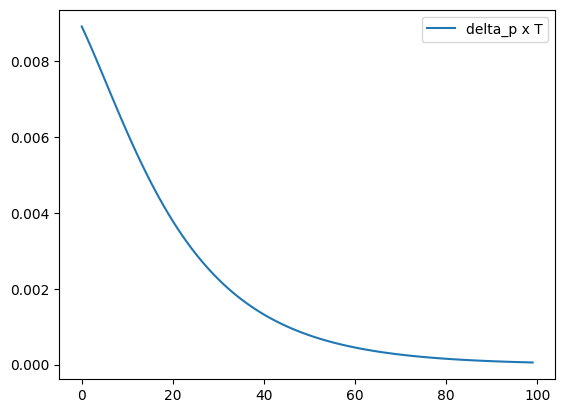

In [17]:
wAA = 0.9
wAa = 1
waa = 0.9

p0_list = [i for i in np.arange(0.3, 0.8, 0.1)]
q0_list = [1 - p0 for p0 in p0_list]

n_gen = int(100)

for p0, q0 in zip(p0_list, q0_list):
    print("Doing for p0: ", p0, " and q0: ", q0)
    run(p0, q0, wAA, wAa, waa, n_gen)

# Teste Caso 4

Doing for p0:  0.3  and q0:  0.7
[0.008768267223382031, 0.008989739077052639, 0.009195306259554226, 0.009382148847064009, 0.009547413168342234, 0.009688273475986386, 0.009802002521462627, 0.009886049273400255, 0.009938121198054567, 0.00995626772900926, 0.009938960879255804, 0.00988516848993709, 0.009794415458825784, 0.009666828520489917, 0.009503160795796689, 0.009304793379162207, 0.009073712621210178, 0.00881246337355246, 0.008524080132919443, 0.008211999577036333, 0.007879959255289282, 0.007531888047901392, 0.007171794356958486, 0.006803657825452988, 0.00643132974550098, 0.006058446316057037, 0.005688357679454539, 0.005324074351431743, 0.004968231396851722, 0.004623069601914616, 0.0042904320256693385, 0.003971773712857084, 0.0036681820157126177, 0.0033804048767253486, 0.0031088845228294006, 0.002853794261642867, 0.002615076399908725, 0.002392479676568783, 0.0021855949801901503, 0.0019938884751005796, 0.0018167315746583194, 0.001653427464098526, 0.0015032340865288336, 0.00136538366584

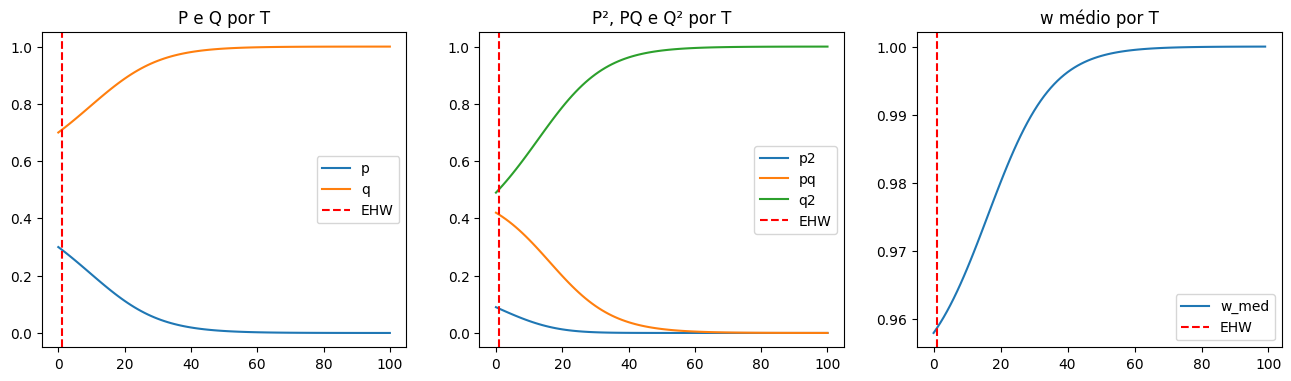

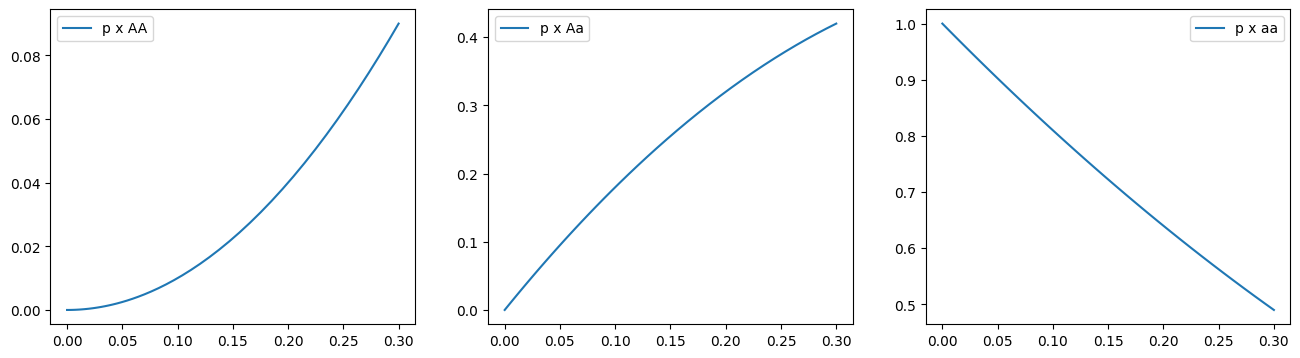

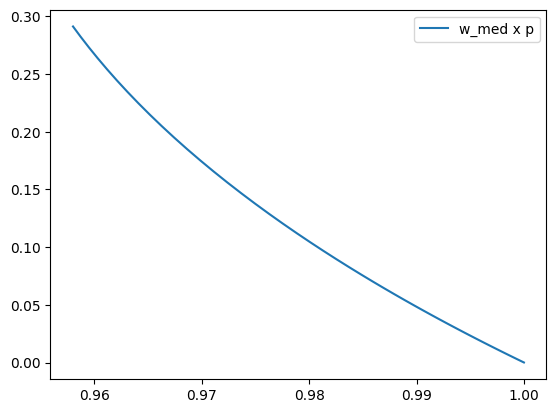

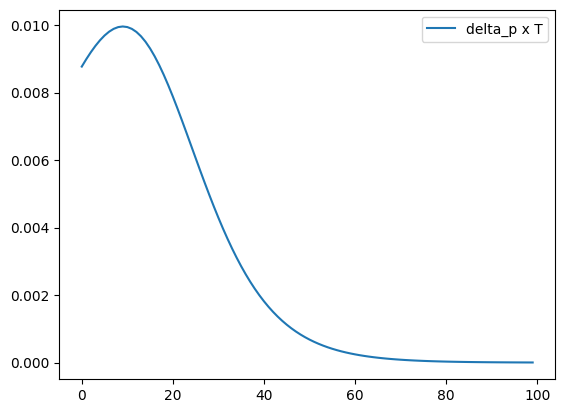

Doing for p0:  0.4  and q0:  0.6
[0.005042016806722727, 0.005272276959314703, 0.005509281717670622, 0.005752618314937619, 0.0060017574695280795, 0.006256039556945203, 0.006514660553715301, 0.006776658141078862, 0.007040898470239143, 0.0073060642170069134, 0.007570644687168837, 0.00783292886775594, 0.008091002443360529, 0.008342749897069013, 0.00858586287525509, 0.008817855994244783, 0.009036091182658357, 0.009237811464155365, 0.009420184772516937, 0.009580357942566564, 0.009715520435796099, 0.009822976654023235, 0.009900224902872928, 0.00994504024571033, 0.009955557714522056, 0.009930351708926116, 0.009868507015381278, 0.00976967680528601, 0.009634123288961571, 0.009462737439540042, 0.009257035333063462, 0.009019130100127476, 0.008751680121406369, 0.008457815759964404, 0.008141048429939554, 0.00780516699004484, 0.007454127196323462, 0.0070919401843487495, 0.006722565675444742, 0.006349814876380158, 0.005977266978575216, 0.005608201901148177, 0.005245550607994073, 0.0048918630936928, 0.

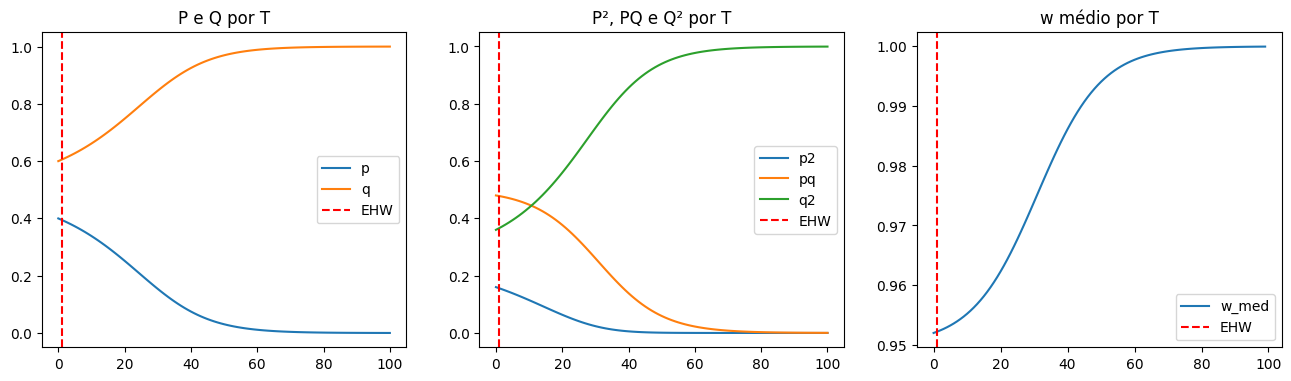

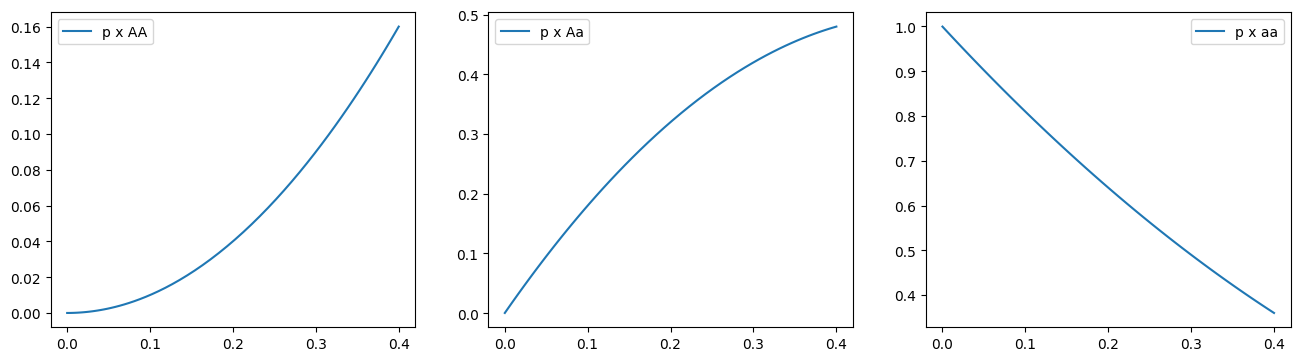

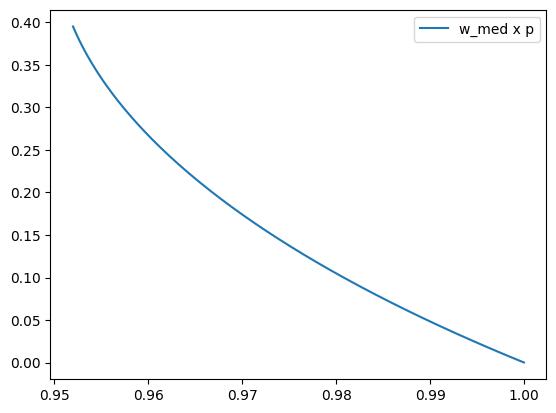

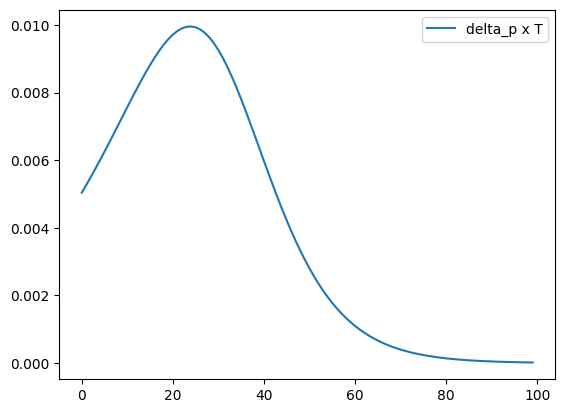

Doing for p0:  0.5  and q0:  0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


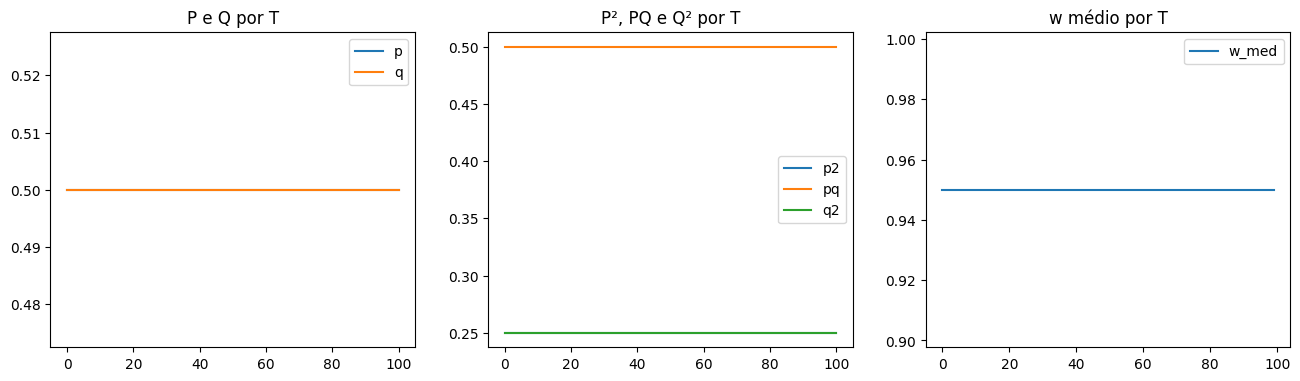

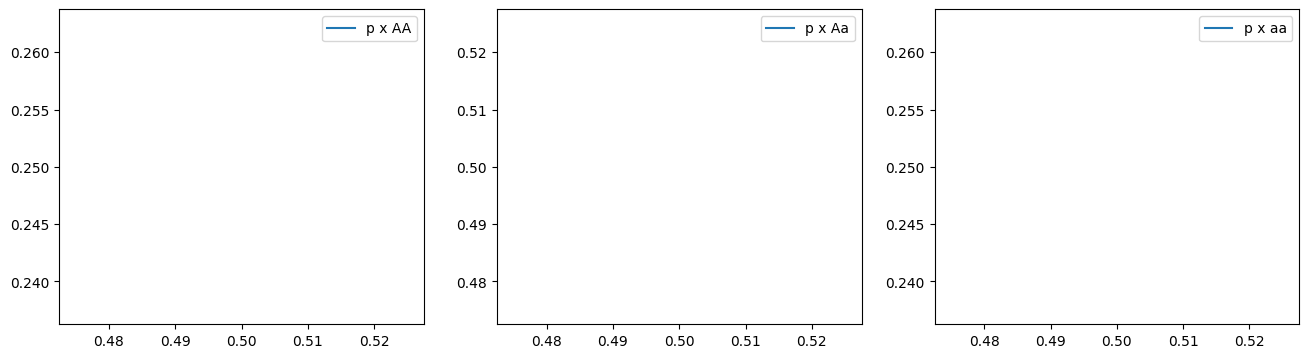

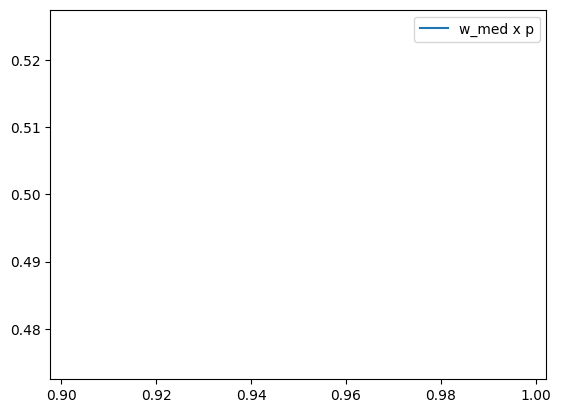

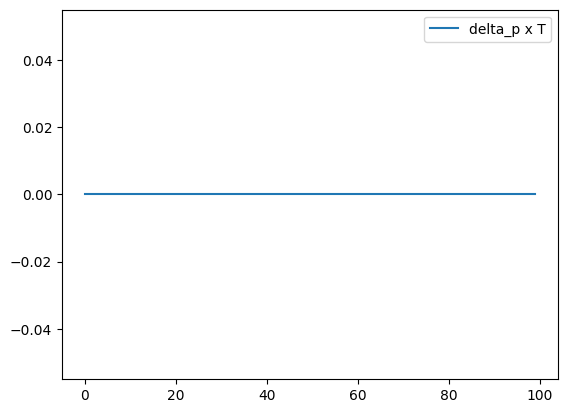

Doing for p0:  0.6000000000000001  and q0:  0.3999999999999999
[0.005042016806722671, 0.005272276959314648, 0.005509281717670622, 0.005752618314937674, 0.006001757469528024, 0.006256039556945203, 0.006514660553715301, 0.006776658141078751, 0.007040898470239143, 0.007306064217006858, 0.007570644687168948, 0.007832928867755884, 0.008091002443360584, 0.008342749897068846, 0.00858586287525498, 0.008817855994244783, 0.009036091182658246, 0.009237811464155365, 0.009420184772516937, 0.009580357942566509, 0.009715520435796043, 0.009822976654023208, 0.0099002249028729, 0.009945040245710302, 0.009955557714522056, 0.009930351708926088, 0.009868507015381334, 0.009769676805285954, 0.009634123288961627, 0.00946273743954007, 0.009257035333063435, 0.00901913010012756, 0.00875168012140648, 0.008457815759964515, 0.008141048429939568, 0.007805166990044743, 0.007454127196323435, 0.007091940184348777, 0.006722565675444825, 0.0063498148763802, 0.0059772669785752575, 0.005608201901148302, 0.00524555060799414

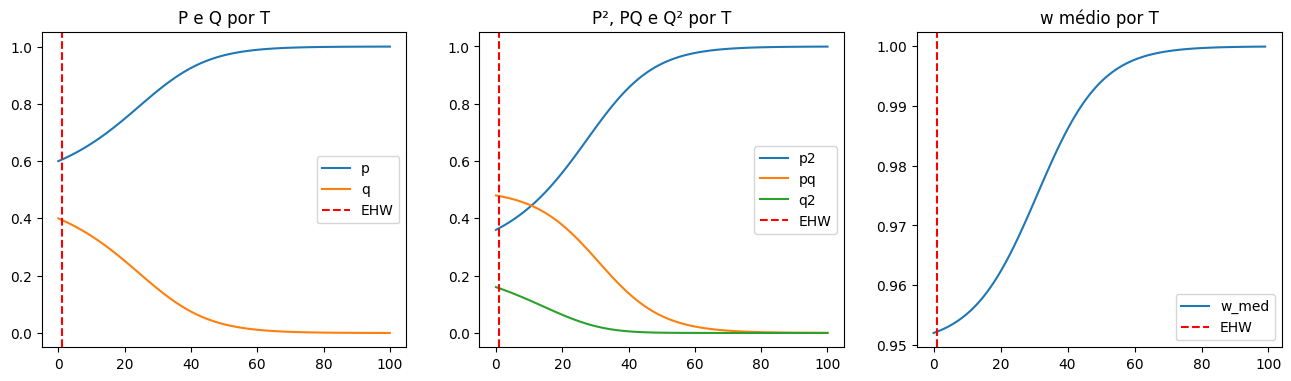

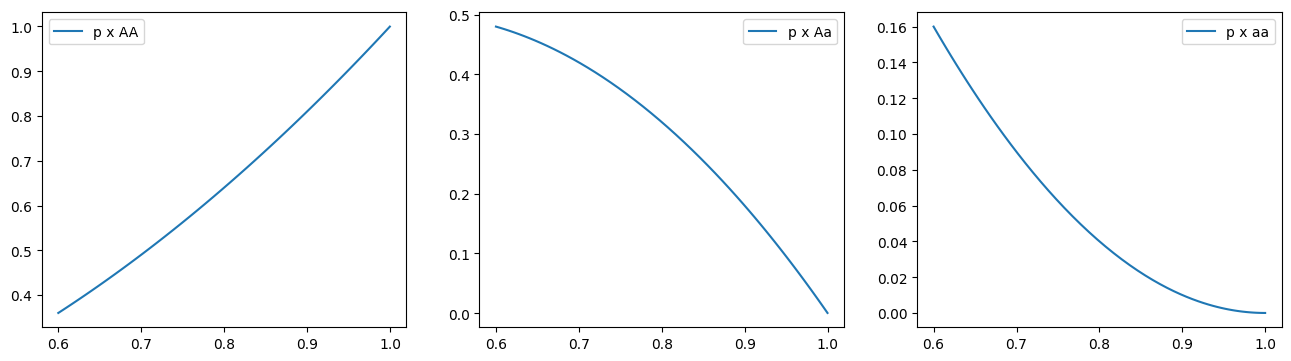

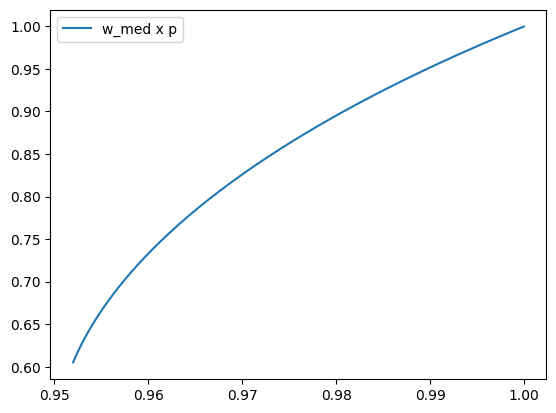

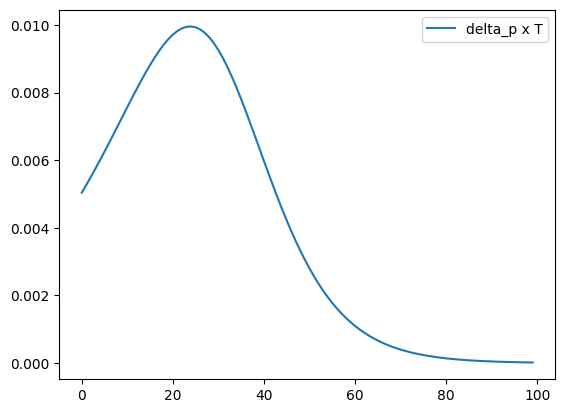

Doing for p0:  0.7000000000000002  and q0:  0.2999999999999998
[0.008768267223382198, 0.008989739077052583, 0.009195306259554226, 0.009382148847064009, 0.00954741316834229, 0.009688273475986331, 0.009802002521462683, 0.0098860492734002, 0.009938121198054484, 0.00995626772900926, 0.009938960879255831, 0.009885168489937146, 0.009794415458825867, 0.009666828520489834, 0.009503160795796717, 0.009304793379162124, 0.009073712621210261, 0.00881246337355257, 0.008524080132919387, 0.008211999577036333, 0.00787995925528917, 0.007531888047901281, 0.007171794356958472, 0.006803657825452891, 0.00643132974550098, 0.00605844631605712, 0.005688357679454525, 0.0053240743514317845, 0.004968231396851763, 0.004623069601914609, 0.004290432025669255, 0.003971773712857174, 0.0036681820157125067, 0.003380404876725418, 0.003108884522829314, 0.0028537942616428946, 0.0026150763999087667, 0.0023924796765687484, 0.0021855949801902197, 0.0019938884751005137, 0.0018167315746583368, 0.001653427464098467, 0.0015032340

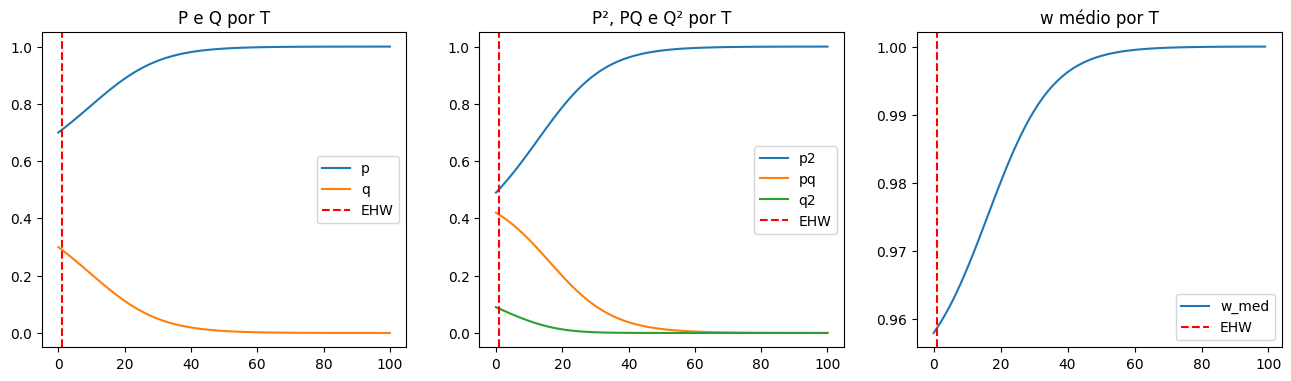

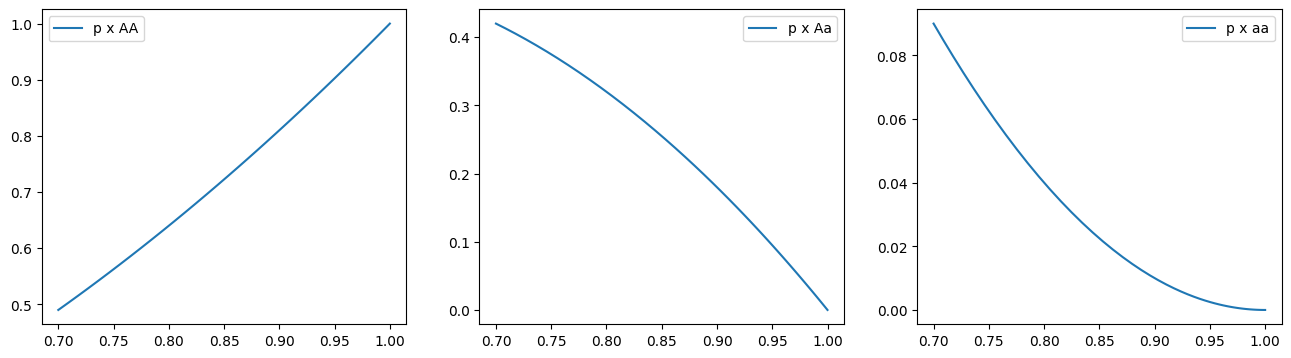

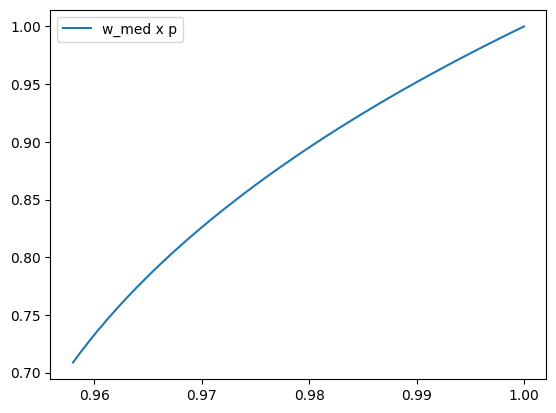

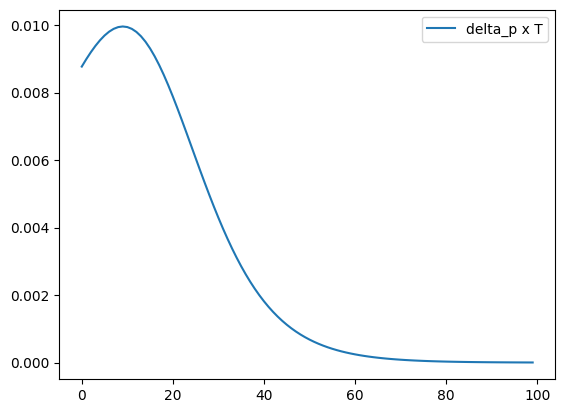

In [18]:
wAA = 1
wAa = 0.9
waa = 1

p0_list = [i for i in np.arange(0.3, 0.8, 0.1)]
q0_list = [1 - p0 for p0 in p0_list]

n_gen = int(100)

for p0, q0 in zip(p0_list, q0_list):
    print("Doing for p0: ", p0, " and q0: ", q0)
    run(p0, q0, wAA, wAa, waa, n_gen)